### Nous allons ici refaire une étude de modélisation, concernant cette fois notre deuxième cible : les émissions de gaz à effet de serre, mesurées en équivalent CO2 (unité selectionnée : la tonne de CO2); Le dioxyde de carbone étant bien sûr, et de loin, le gaz le plus rejeté en liaison avec la consommations énergétique.
<br>Nous allons reprendre le DataFrame de modélisation utilisé pour la consommation, sans l'ENERGYSTARScore pour commencer (et sans la première cible bien sûr), puis cette fois nous contenter d'évaluer l'impact de cette donnée avec le meilleur modèle sélectionné au préalable.

# Sommaire
<br>1 - Encore un peu de 'nettoyage'
<br>2 - <a href="#E2">Finalisation des données de modélisation et régression linéaire</a>
<br>3 - <a href="#E3">ElasticNet</a>
<br>4 - <a href="#E4">Régression ridge à noyau</a>
<br>5 - <a href="#E5">Régression SVM</a>
<br>6 - <a href="#E6">RandomForestRegressor</a>
<br>7 - <a href="#E7">GradientBoostingRegressor</a>
<br>8 - <a href="#E8">Inclusion du score Energy Star</a>

In [1]:
import pandas as pd
data = pd.read_csv('2016_Building_Energy_Benchmarking.csv')
data = data.drop('Unnamed: 0', axis=1)

In [3]:
data.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'UseType1GFApercent', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'UseType2GFApercent',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'UseType3GFApercent', 'YearsENERGYSTARCertified', 'ENERGYSTARScore',
       'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)',
       'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)',
       'SteamUse(kBtu)', 'Electricity(kWh)', 'Electricity(kBtu)',
       'NaturalGas(therms)', 'NaturalG

In [2]:
DF = pd.read_csv('DFmodel5.csv')
DF = DF.drop('Unnamed: 0', axis=1)
DF.head()

,NumberofFloors,PropertyGFATotal,PropGFABuildingPercent,UseType2GFApercent,UseType3GFApercent,SiteEnergyUse(kBtu),SteamPercent(kBtu),ElecPercent(kBtu),NatGasPercent(kBtu),NBH_1,...,ThirdUse3,ThirdUse4,ThirdUse5,ThirdUse6,ThirdUse7,ThirdUse8,ThirdUse9,ThirdUse10,ThirdUse11,ThirdUse12
0,3.308756e+06,11.394480,61.765069,0.000000,0.000000,16.307609,0.000000,60.988402,39.011598,0,...,0,0,0,0,0,0,0,0,0,0
1,2.186685e+07,11.540161,100.000000,0.000000,0.000000,15.655764,36.142251,57.741808,6.115925,0,...,0,0,0,0,0,0,0,0,0,0
2,2.262008e+07,12.936002,86.165049,11.807599,0.258803,16.738073,3.967750,96.032231,0.000000,0,...,0,0,0,0,0,0,0,1,0,0
3,1.440536e+07,11.775290,100.000000,30.769231,0.000000,16.113726,46.124597,44.733737,9.141661,0,...,0,0,0,0,0,0,0,1,0,0
4,1.125165e+07,10.637969,100.000000,37.192957,23.366436,15.844459,23.352382,49.497097,27.150514,0,...,0,0,0,0,1,0,0,0,0,0


In [6]:
DF.columns

Index(['NumberofFloors', 'PropertyGFATotal', 'PropGFABuildingPercent',
       'UseType2GFApercent', 'UseType3GFApercent', 'SiteEnergyUse(kBtu)',
       'SteamPercent(kBtu)', 'ElecPercent(kBtu)', 'NatGasPercent(kBtu)',
       'NBH_1', 'NBH_2', 'NBH_3', 'NBH_4', 'NBH_5', 'NBH_6', 'NBH_7', 'NBH_8',
       'NBH_9', 'NBH_10', 'NBH_11', 'NBH_12', 'per1', 'per2', 'per3', 'per4',
       'per5', 'per6', 'per7', 'per8', 'per9', 'NB_1', 'NB_2', 'NB_3', 'NB_4',
       'NB_5', 'NB_6', 'NB_7', 'NB_8', 'NB_9', 'NB_10', 'NB_11', 'NB_12',
       'FirstUse1', 'FirstUse2', 'FirstUse3', 'FirstUse4', 'FirstUse5',
       'FirstUse6', 'FirstUse7', 'FirstUse8', 'FirstUse9', 'FirstUse10',
       'SecondUse1', 'SecondUse2', 'SecondUse3', 'SecondUse4', 'SecondUse5',
       'SecondUse6', 'SecondUse7', 'SecondUse8', 'SecondUse9', 'SecondUse10',
       'SecondUse11', 'SecondUse12', 'ThirdUse1', 'ThirdUse2', 'ThirdUse3',
       'ThirdUse4', 'ThirdUse5', 'ThirdUse6', 'ThirdUse7', 'ThirdUse8',
       'ThirdUse9', 'Thi

In [3]:
DF = DF.drop('SiteEnergyUse(kBtu)', axis=1)

In [4]:
data['TotalGHGEmissions'].describe()

count     1507.000000
mean       141.836934
std        580.880127
min         -0.800000
25%         18.830000
50%         46.440000
75%        122.330000
max      16870.980000
Name: TotalGHGEmissions, dtype: float64

In [5]:
data.loc[data['TotalGHGEmissions'] < 10, ['OSEBuildingID','TotalGHGEmissions']]

,OSEBuildingID,TotalGHGEmissions
8,31,9.13
12,41,3.93
27,87,4.19
37,111,6.11
98,234,3.00
...,...,...
1484,50038,4.38
1491,50081,9.24
1494,50196,4.44
1497,50210,3.50


In [6]:
data.loc[data['TotalGHGEmissions'] < 3, ['OSEBuildingID','TotalGHGEmissions']]

,OSEBuildingID,TotalGHGEmissions
312,539,2.22
313,540,2.80
436,700,0.00
516,797,1.06
573,19572,2.41
574,19576,2.57
611,19876,2.92
653,20396,0.63
665,20470,1.86
680,20541,0.82


In [7]:
# on peut supposer que ces propriétés à très faible émission consomment essentiellement de l'électricité, vérifions :
data.loc[data['TotalGHGEmissions'] < 2, ['OSEBuildingID','TotalGHGEmissions','SiteEnergyUse(kBtu)','Electricity(kBtu)']]

,OSEBuildingID,TotalGHGEmissions,SiteEnergyUse(kBtu),Electricity(kBtu)
436,700,0.00,1.252517e+07,0.0
516,797,1.06,1.517543e+05,151754.0
653,20396,0.63,9.055900e+04,90559.0
665,20470,1.86,2.671351e+05,267135.0
680,20541,0.82,1.174384e+05,117438.0
682,20556,1.73,2.486160e+05,248616.0
685,20604,1.70,2.435182e+05,243518.0
692,20626,1.67,2.389700e+05,238970.0
723,20989,1.55,2.226001e+05,222600.0
772,21315,0.17,2.410550e+04,24105.0


In [8]:
# notre supposition est exacte, à part deux anomalies, voyons déjà celle avec des émissions négatives !
data.loc[1457]

OSEBuildingID                                            49784
DataYear                                                  2016
BuildingType                                    NonResidential
PrimaryPropertyType                Small- and Mid-Sized Office
PropertyName                                    Bullitt Center
Address                                    1501 E. Madison St.
City                                                   Seattle
State                                                       WA
ZipCode                                                98122.0
TaxParcelIdentificationNumber                       7234600195
CouncilDistrictCode                                          3
Neighborhood                                           CENTRAL
Latitude                                              47.61432
Longitude                                           -122.31257
YearBuilt                                                 2013
NumberofBuildings                                      

In [9]:
# Nous avions déjà rencontré ce batiment hors norme. Voyons l'autre anomalie :
data.loc[436]

OSEBuildingID                                                                    700
DataYear                                                                        2016
BuildingType                                                          NonResidential
PrimaryPropertyType                                      Supermarket / Grocery Store
PropertyName                                               IUC- Whole Foods Interbay
Address                                                        2001 15th Avenue West
City                                                                         Seattle
State                                                                             WA
ZipCode                                                                      98119.0
TaxParcelIdentificationNumber                                             7666201460
CouncilDistrictCode                                                                7
Neighborhood                                                   MA

In [4]:
# manifestement la donnée est erronée, nous allons utiliser 'GHGEmissionsIntensity.mean' et la surface pour la correction :
data.loc[data['OSEBuildingID'] == 700, 'GHGEmissionsIntensity'] = data['GHGEmissionsIntensity'].mean()

In [5]:
data.loc[data['OSEBuildingID'] == 700, 'TotalGHGEmissions'] = data['GHGEmissionsIntensity'].mean() * 57176

In [12]:
# Voyons maintenant les outliers hauts :
data.loc[data['TotalGHGEmissions'] > 300, ['OSEBuildingID','TotalGHGEmissions','GHGEmissionsIntensity']]

,OSEBuildingID,TotalGHGEmissions,GHGEmissionsIntensity
0,9,301.81,3.10
3,22,433.86,4.18
5,26,1265.29,2.34
7,30,388.04,3.07
13,43,16870.98,1.50
...,...,...,...
1463,49865,809.76,2.65
1468,49918,457.51,8.51
1471,49926,1280.81,2.99
1475,49967,11140.56,1.20


In [13]:
data.loc[data['TotalGHGEmissions'] > 500, ['OSEBuildingID','TotalGHGEmissions','GHGEmissionsIntensity']]

,OSEBuildingID,TotalGHGEmissions,GHGEmissionsIntensity
5,26,1265.29,2.34
13,43,16870.98,1.50
24,60,584.31,11.12
32,103,607.41,1.56
34,106,804.20,2.03
...,...,...,...
1456,49783,1088.25,3.20
1463,49865,809.76,2.65
1471,49926,1280.81,2.99
1475,49967,11140.56,1.20


In [14]:
data.loc[data['TotalGHGEmissions'] > 1000, ['OSEBuildingID','TotalGHGEmissions','GHGEmissionsIntensity']]

,OSEBuildingID,TotalGHGEmissions,GHGEmissionsIntensity
5,26,1265.290000,2.340000
13,43,16870.980000,1.500000
73,338,2055.820000,6.870000
107,249,1246.550000,1.060000
194,387,1084.790000,3.640000
258,466,1268.870000,7.990000
269,477,3995.450000,7.450000
275,488,1019.530000,2.340000
301,525,1623.340000,10.500000
356,588,1156.450000,4.590000


La propriété de BID 43 est un campus que nous avions déjà traité. Celle de BID 700 a été traité un peu plus haut. La '49967' est aussi un campus déjà vu (datant de 1900). Et enfin la '19900' (max. intensité) a déjà été vérifiée aussi, toutefois nous pouvons en savoir un peu plus :

In [15]:
data.iloc[615, 0:10]

OSEBuildingID                                19900
DataYear                                      2016
BuildingType                        NonResidential
PrimaryPropertyType                     Laboratory
PropertyName                     3000/3018 Western
Address                          3018 Western Ave.
City                                       Seattle
State                                           WA
ZipCode                                    98121.0
TaxParcelIdentificationNumber           0695000090
Name: 615, dtype: object

In [16]:
data['GHGEmissionsIntensity'].describe()

count    1507.000000
mean        1.483585
std         2.141419
min        -0.020000
25%         0.330000
50%         0.800000
75%         1.680000
max        25.710000
Name: GHGEmissionsIntensity, dtype: float64

<a name='E2'>

Nous pouvons maintenant inclure ces données dans la modélisation, nous prendrons seulement TotalGHGEmissions (nous avons déjà la surface totale), ou plutôt son log. étant donné l'étalement des valeurs. Mais cela suppose que toutes les valeurs soient strictement positives, il faut donc passer à 0 le cas particulier d'émission négative, ce qui n'aura pas beaucoup d'impact globalement car la valeur absolue concernée est très petite. Et nous prendrons le 'log(1 + x)' pour n'avoir que des valeurs psositves (fonction réciproque : exp(x) - 1)

In [6]:
DF['TotalGHGEmissions'] = data['TotalGHGEmissions']

In [7]:
DF.loc[DF['TotalGHGEmissions'] < 0, 'TotalGHGEmissions'] = 0

In [8]:
import numpy as np
DF['TotalGHGEmissions'] = np.log(DF['TotalGHGEmissions'] + 1)

In [9]:
# nous pouvons maintenant commencer le processus de modélisation, i.e. déjà standardiser les données non binaires :
from sklearn.preprocessing import StandardScaler
DFnum = DF[['NumberofFloors', 'PropertyGFATotal', 'PropGFABuildingPercent', 'UseType2GFApercent', 'UseType3GFApercent', \
            'SteamPercent(kBtu)', 'ElecPercent(kBtu)', 'NatGasPercent(kBtu)', 'TotalGHGEmissions']]
st_scaler = StandardScaler().fit(DFnum)
DFstd = st_scaler.transform(DFnum)

In [21]:
DF.columns

Index(['NumberofFloors', 'PropertyGFATotal', 'PropGFABuildingPercent',
       'UseType2GFApercent', 'UseType3GFApercent', 'SteamPercent(kBtu)',
       'ElecPercent(kBtu)', 'NatGasPercent(kBtu)', 'NBH_1', 'NBH_2', 'NBH_3',
       'NBH_4', 'NBH_5', 'NBH_6', 'NBH_7', 'NBH_8', 'NBH_9', 'NBH_10',
       'NBH_11', 'NBH_12', 'per1', 'per2', 'per3', 'per4', 'per5', 'per6',
       'per7', 'per8', 'per9', 'NB_1', 'NB_2', 'NB_3', 'NB_4', 'NB_5', 'NB_6',
       'NB_7', 'NB_8', 'NB_9', 'NB_10', 'NB_11', 'NB_12', 'FirstUse1',
       'FirstUse2', 'FirstUse3', 'FirstUse4', 'FirstUse5', 'FirstUse6',
       'FirstUse7', 'FirstUse8', 'FirstUse9', 'FirstUse10', 'SecondUse1',
       'SecondUse2', 'SecondUse3', 'SecondUse4', 'SecondUse5', 'SecondUse6',
       'SecondUse7', 'SecondUse8', 'SecondUse9', 'SecondUse10', 'SecondUse11',
       'SecondUse12', 'ThirdUse1', 'ThirdUse2', 'ThirdUse3', 'ThirdUse4',
       'ThirdUse5', 'ThirdUse6', 'ThirdUse7', 'ThirdUse8', 'ThirdUse9',
       'ThirdUse10', 'ThirdUse11',

In [23]:
DF.shape

(1507, 76)

In [10]:
# et on complete notre DF avec les données binaires :
DFcat = DF[DF.columns[8:75]].values 
DFstd = np.concatenate((DFstd ,DFcat), axis=1)

In [29]:
DFstd[0,:]

array([-0.47658103,  0.41749277, -2.34509778, -0.76881683, -0.37579613,
       -0.21082812, -0.37728142,  0.46125989,  1.29569005,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [11]:
from sklearn import model_selection   # la colonne 'étiquette' est la neuvième du tableau (donc n°8)
X_train, X_test, y_train, y_test = model_selection.train_test_split(np.delete(DFstd, 8, axis=1),\
                                                                    DFstd[:,8], test_size=0.25)

In [31]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.7364748287908623

In [32]:
lr.score(X_test, y_test)

0.7089200830204393

In [33]:
# Nous avons déjà un score correct avec la régression linéaire, selon le R²; Voyons quelques autres évaluateurs :
from sklearn import metrics
print("RMSE train lr: ", str(np.sqrt(metrics.mean_squared_error(y_train, lr.predict(X_train)))))
print("RMSE test lr: ", str(np.sqrt(metrics.mean_squared_error(y_test, lr.predict(X_test)))))
print("MAE train lr: ", str(metrics.mean_absolute_error(y_train, lr.predict(X_train))))
print("MAE test lr: ", str(metrics.mean_absolute_error(y_test, lr.predict(X_test))))

RMSE train lr:  0.5176849859687239
RMSE test lr:  0.5221762280450978
MAE train lr:  0.3759829911432958
MAE test lr:  0.39857074474731363


<a name='E3'>

In [34]:
# Aurons nous une meilleure performance avec un ElasticNet ?
from sklearn.linear_model import ElasticNet
alpha_range = np.logspace(-3, 2, 6)
l1_ratio_range = np.linspace(0,1,11)
param_grid = {'alpha': alpha_range, 'l1_ratio': l1_ratio_range}
score = {'R²':'r2', 'MAE': 'neg_mean_absolute_error', 'RMSE': 'neg_root_mean_squared_error'}
grid1 = model_selection.GridSearchCV(ElasticNet(fit_intercept=False, max_iter=1500, tol=1e-3, random_state=2,\
                                               selection='random'), param_grid, cv=5, scoring=score, refit='R²')
grid1.fit(X_train, y_train)
print("The optimal parameters are {} with a score of {:.2f}".format(grid1.best_params_, grid1.best_score_))

C:\Users\jlper\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.216e+02, tolerance: 9.152e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\jlper\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.160e+02, tolerance: 9.409e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

C:\Users\jlper\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.258e+02, tolerance: 9.152e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\jlper\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.377e+02, tolerance: 9.409e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

The optimal parameters are {'alpha': 0.1, 'l1_ratio': 0.0} with a score of 0.66


C:\Users\jlper\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.312e+02, tolerance: 8.684e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\jlper\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.144e+02, tolerance: 1.150e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

In [37]:
# Les meilleurs paramètres correspondent à une régression ridge. Affinons tout de même :
alpha_range = [0.05, 0.07, 0.08, 0.09, 0.1, 0.15, 0.2, 0.3, 0.5]
l1_ratio_range = [0.01, 0.02, 0.03, 0.04, 0.05]
param_grid = {'alpha': alpha_range, 'l1_ratio': l1_ratio_range}
grid2 = model_selection.GridSearchCV(ElasticNet(fit_intercept=False, max_iter=1500, tol=1e-3, random_state=2,\
                                               selection='random'), param_grid, cv=5, scoring=score, refit='R²')
grid2.fit(X_train, y_train)
print("The optimal parameters are {} with a score of {:.2f}".format(grid2.best_params_, grid2.best_score_))

The optimal parameters are {'alpha': 0.05, 'l1_ratio': 0.01} with a score of 0.67


In [38]:
EN = ElasticNet(alpha=0.05, l1_ratio=0.01, tol=1e-3, random_state=2, selection='random')
EN.fit(X_train, y_train)
print('Score R² sur jeu entrainement: ', str(EN.score(X_train, y_train)))
EN.predict(X_test)
print('Score R² sur jeu de test: ', str(EN.score(X_test, y_test)))

Score R² sur jeu entrainement:  0.7041032360667997
Score R² sur jeu de test:  0.6915965514071064


In [42]:
# la régression linéaire est un tout petit peu meilleure, toutefois voyons le détail des résultats :
grid_results = pd.DataFrame(grid1.cv_results_)
grid_results.sort_values('rank_test_R²').iloc[:20,4:24]

,param_alpha,param_l1_ratio,params,split0_test_R²,split1_test_R²,split2_test_R²,split3_test_R²,split4_test_R²,mean_test_R²,std_test_R²,rank_test_R²,split0_test_MAE,split1_test_MAE,split2_test_MAE,split3_test_MAE,split4_test_MAE,mean_test_MAE,std_test_MAE,rank_test_MAE,split0_test_RMSE
22,0.1,0.0,"{'alpha': 0.1, 'l1_ratio': 0.0}",0.665118,0.606044,0.604011,0.697728,0.751717,0.664924,0.056190,1,-0.455531,-0.432153,-0.399160,-0.401324,-0.423105,-0.422255,0.020869,23,-0.589873
12,0.01,0.1,"{'alpha': 0.01, 'l1_ratio': 0.1}",0.694525,0.546545,0.569734,0.711108,0.784939,0.661370,0.089916,2,-0.435215,-0.430329,-0.400982,-0.392503,-0.382676,-0.408341,0.020830,1,-0.563379
13,0.01,0.2,"{'alpha': 0.01, 'l1_ratio': 0.2}",0.691503,0.549597,0.571189,0.712650,0.781092,0.661206,0.087746,3,-0.436281,-0.430463,-0.401370,-0.390098,-0.386318,-0.408906,0.020663,6,-0.566159
11,0.01,0.0,"{'alpha': 0.01, 'l1_ratio': 0.0}",0.696943,0.542995,0.566644,0.710350,0.788234,0.661033,0.092460,4,-0.434813,-0.432042,-0.400773,-0.394856,-0.379478,-0.408392,0.021609,2,-0.561144
14,0.01,0.3,"{'alpha': 0.01, 'l1_ratio': 0.30000000000000004}",0.688210,0.550882,0.572451,0.713247,0.777531,0.660464,0.086041,5,-0.438736,-0.431414,-0.401765,-0.390120,-0.390485,-0.410504,0.020625,15,-0.569172
15,0.01,0.4,"{'alpha': 0.01, 'l1_ratio': 0.4}",0.683991,0.551777,0.573726,0.712806,0.775783,0.659617,0.084764,6,-0.442440,-0.432198,-0.402905,-0.390923,-0.393343,-0.412362,0.021019,16,-0.573011
16,0.01,0.5,"{'alpha': 0.01, 'l1_ratio': 0.5}",0.680999,0.552150,0.571053,0.711468,0.773753,0.657885,0.084321,7,-0.444635,-0.432879,-0.404302,-0.392242,-0.396437,-0.414099,0.020837,17,-0.575716
17,0.01,0.6,"{'alpha': 0.01, 'l1_ratio': 0.6000000000000001}",0.678374,0.552000,0.568495,0.710675,0.771204,0.656150,0.083946,8,-0.445887,-0.433851,-0.406144,-0.392892,-0.399769,-0.415709,0.020523,18,-0.578081
18,0.01,0.7,"{'alpha': 0.01, 'l1_ratio': 0.7000000000000001}",0.675686,0.551573,0.565758,0.709744,0.768642,0.654281,0.083664,9,-0.447229,-0.434850,-0.408583,-0.393655,-0.402564,-0.417376,0.020278,19,-0.580491
19,0.01,0.8,"{'alpha': 0.01, 'l1_ratio': 0.8}",0.672689,0.550858,0.563089,0.709157,0.766805,0.652520,0.083676,10,-0.449219,-0.436058,-0.411024,-0.394294,-0.404698,-0.419059,0.020409,20,-0.583168


In [43]:
grid_results.sort_values('rank_test_R²').iloc[:20,20:]

,mean_test_MAE,std_test_MAE,rank_test_MAE,split0_test_RMSE,split1_test_RMSE,split2_test_RMSE,split3_test_RMSE,split4_test_RMSE,mean_test_RMSE,std_test_RMSE,rank_test_RMSE
22,-0.422255,0.020869,23,-0.589873,-0.604261,-0.609563,-0.531692,-0.551387,-0.577355,0.030586,4
12,-0.408341,0.020830,1,-0.563379,-0.648288,-0.635398,-0.519792,-0.513174,-0.576006,0.056603,2
13,-0.408906,0.020663,6,-0.566159,-0.646103,-0.634322,-0.518402,-0.517743,-0.576546,0.054996,3
11,-0.408392,0.021609,2,-0.561144,-0.650821,-0.637675,-0.520473,-0.509227,-0.575868,0.058591,1
14,-0.410504,0.020625,15,-0.569172,-0.645181,-0.633388,-0.517864,-0.521937,-0.577508,0.053698,5
15,-0.412362,0.021019,16,-0.573011,-0.644537,-0.632443,-0.518261,-0.523984,-0.578447,0.052729,6
16,-0.414099,0.020837,17,-0.575716,-0.644269,-0.634423,-0.519468,-0.526350,-0.580045,0.052255,7
17,-0.415709,0.020523,18,-0.578081,-0.644378,-0.636312,-0.520180,-0.529307,-0.581651,0.051872,8
18,-0.417376,0.020278,19,-0.580491,-0.644684,-0.638326,-0.521017,-0.532262,-0.583356,0.051552,9
19,-0.419059,0.020409,20,-0.583168,-0.645198,-0.640286,-0.521544,-0.534371,-0.584913,0.051524,10


Les résultats sont très stables pour les 20 meilleurs scores R², et le rang de la RMSE est le plus souvent le même que pour le R². On voit clairement que alpha a un rôle plus déterminant, sur la qualité du modèle, que l1_ratio : ce dernier ne fait guère varier le résultat pour une valeur donnée de alpha. Avec des MAE & RMSE < 0 (?!) difficile de comparer avec la reg. linéaire. Résulats pour l'affinage :

In [44]:
grid_results = pd.DataFrame(grid2.cv_results_)
grid_results.sort_values('rank_test_R²').iloc[:20,4:24]

,param_alpha,param_l1_ratio,params,split0_test_R²,split1_test_R²,split2_test_R²,split3_test_R²,split4_test_R²,mean_test_R²,std_test_R²,rank_test_R²,split0_test_MAE,split1_test_MAE,split2_test_MAE,split3_test_MAE,split4_test_MAE,mean_test_MAE,std_test_MAE,rank_test_MAE,split0_test_RMSE
0,0.05,0.01,"{'alpha': 0.05, 'l1_ratio': 0.01}",0.678625,0.595902,0.596642,0.706616,0.768378,0.669233,0.066276,1,-0.445563,-0.430875,-0.400293,-0.394789,-0.404531,-0.415210,0.019597,1,-0.577855
1,0.05,0.02,"{'alpha': 0.05, 'l1_ratio': 0.02}",0.677463,0.595236,0.595543,0.706855,0.767052,0.668430,0.066264,2,-0.446159,-0.431796,-0.400987,-0.394473,-0.406033,-0.415890,0.019734,2,-0.578898
2,0.05,0.03,"{'alpha': 0.05, 'l1_ratio': 0.03}",0.676166,0.594391,0.594389,0.707197,0.765674,0.667564,0.066301,3,-0.446877,-0.432511,-0.401460,-0.394219,-0.407490,-0.416511,0.019915,3,-0.580061
5,0.07,0.01,"{'alpha': 0.07, 'l1_ratio': 0.01}",0.671935,0.601434,0.600324,0.703395,0.760337,0.667485,0.061326,4,-0.450136,-0.432126,-0.399995,-0.397170,-0.413891,-0.418664,0.020025,6,-0.583839
3,0.05,0.04,"{'alpha': 0.05, 'l1_ratio': 0.04}",0.674829,0.593298,0.593159,0.707171,0.764385,0.666569,0.066396,5,-0.447735,-0.433066,-0.401857,-0.394305,-0.408871,-0.417167,0.020065,4,-0.581257
6,0.07,0.02,"{'alpha': 0.07, 'l1_ratio': 0.02}",0.670290,0.600179,0.599107,0.703477,0.758584,0.666327,0.061321,6,-0.451059,-0.433085,-0.400594,-0.397186,-0.415753,-0.419535,0.020248,7,-0.585300
10,0.08,0.01,"{'alpha': 0.08, 'l1_ratio': 0.01}",0.668889,0.602735,0.601437,0.701503,0.756548,0.666222,0.059394,7,-0.452273,-0.432645,-0.399890,-0.398622,-0.418033,-0.420293,0.020329,8,-0.586542
4,0.05,0.05,"{'alpha': 0.05, 'l1_ratio': 0.05}",0.673339,0.591431,0.591704,0.706789,0.763281,0.665309,0.066722,8,-0.448789,-0.433722,-0.402358,-0.394696,-0.410133,-0.417940,0.020223,5,-0.582588
7,0.07,0.03,"{'alpha': 0.07, 'l1_ratio': 0.03}",0.668570,0.598935,0.597657,0.703088,0.757024,0.665055,0.061370,9,-0.452058,-0.433671,-0.401097,-0.397537,-0.417278,-0.420328,0.020413,9,-0.586825
11,0.08,0.02,"{'alpha': 0.08, 'l1_ratio': 0.02}",0.667068,0.601648,0.600014,0.701452,0.754700,0.664976,0.059356,10,-0.453346,-0.433440,-0.400510,-0.398778,-0.419839,-0.421183,0.020571,10,-0.588154


In [45]:
grid_results.sort_values('rank_test_R²').iloc[:20,20:]

,mean_test_MAE,std_test_MAE,rank_test_MAE,split0_test_RMSE,split1_test_RMSE,split2_test_RMSE,split3_test_RMSE,split4_test_RMSE,mean_test_RMSE,std_test_RMSE,rank_test_RMSE
0,-0.415210,0.019597,1,-0.577855,-0.611990,-0.615208,-0.523816,-0.532566,-0.572287,0.038410,1
1,-0.415890,0.019734,2,-0.578898,-0.612494,-0.616046,-0.523604,-0.534088,-0.573026,0.038475,2
2,-0.416511,0.019915,3,-0.580061,-0.613133,-0.616924,-0.523298,-0.535665,-0.573816,0.038602,3
5,-0.418664,0.020025,6,-0.583839,-0.607787,-0.612395,-0.526684,-0.541732,-0.574487,0.034616,4
3,-0.417167,0.020065,4,-0.581257,-0.613959,-0.617859,-0.523321,-0.537137,-0.574707,0.038724,5
6,-0.419535,0.020248,7,-0.585300,-0.608743,-0.613326,-0.526611,-0.543709,-0.575538,0.034735,6
10,-0.420293,0.020329,8,-0.586542,-0.606794,-0.611541,-0.528362,-0.545997,-0.575847,0.033142,8
4,-0.417940,0.020223,5,-0.582588,-0.615366,-0.618963,-0.523662,-0.538394,-0.575795,0.038967,7
7,-0.420328,0.020413,9,-0.586825,-0.609689,-0.614434,-0.526957,-0.545463,-0.576674,0.034828,9
11,-0.421183,0.020571,10,-0.588154,-0.607624,-0.612632,-0.528406,-0.548065,-0.576976,0.033258,10


Dans cette deuxième validation croisée (et pour les 20 meilleurs scores) le classement par la RMSE est le même que par le R², et très proche de celui de la MAE. L1_ratio a une influence plus déterminante que lors du premier 'ratissage'. Mais de nouveau on obtient des scores quasiment identiques pour toute une plage de paramètres, le choix serait donc à effectuer après avoir relancé une recherche par grille sur plusieurs tirages de jeux d'entrainement / test : on garderait les paramètres qui arrivent le plus souvent en tête. Essayons les modèles non linéaires, et pour commencer une regression ridge à noyau gaussien : <a name='E4'>

In [12]:
from sklearn import kernel_ridge
alpha_range = np.logspace(-3, 2, 6)
gamma_range = np.logspace(-3, 1, 5)
param_grid = {'alpha': alpha_range, 'gamma': gamma_range}
score = {'R²':'r2', 'MAE': 'neg_mean_absolute_error', 'RMSE': 'neg_root_mean_squared_error'}
grid3 = model_selection.GridSearchCV(kernel_ridge.KernelRidge(kernel='rbf'), param_grid, cv=5, scoring=score, refit='R²')
grid3.fit(X_train, y_train)
print("The optimal parameters are {} with a score of {:.2f}".format(grid3.best_params_,grid3.best_score_))

The optimal parameters are {'alpha': 0.1, 'gamma': 0.01} with a score of 0.72


In [13]:
# C'est le meilleur score pour le moment. Affinons un peu les valeurs des hyper param. :
alpha_range = [0.05, 0.07, 0.09, 0.1, 0.11, 0.13, 0.15]
gamma_range = [0.005, 0.007, 0.009, 0.01, 0.011, 0.013, 0.015]
param_grid = {'alpha': alpha_range, 'gamma': gamma_range}
grid4 = model_selection.GridSearchCV(kernel_ridge.KernelRidge(kernel='rbf'), param_grid, cv=5, scoring=score, refit='R²')
grid4.fit(X_train, y_train)
print("The optimal parameters are {} with a score of {:.2f}".format(grid4.best_params_,grid4.best_score_))

The optimal parameters are {'alpha': 0.1, 'gamma': 0.015} with a score of 0.73


In [14]:
# Affinons de nouveau sur gamma qui atteint la borne sup. de l'intervalle :
gamma_range = [0.015, 0.02, 0.025, 0.03, 0.035, 0.04]
param_grid = {'alpha': alpha_range, 'gamma': gamma_range}
grid5 = model_selection.GridSearchCV(kernel_ridge.KernelRidge(kernel='rbf'), param_grid, cv=5, scoring=score, refit='R²')
grid5.fit(X_train, y_train)
print("The optimal parameters are {} with a score of {:.2f}".format(grid5.best_params_,grid5.best_score_))

The optimal parameters are {'alpha': 0.15, 'gamma': 0.025} with a score of 0.73


In [15]:
# comme j'ai omis de fixer alpha à 0.1 il a été réévalué, mais nous allons voir que cette différence n'a que très peu d'impact
KRR = kernel_ridge.KernelRidge(alpha=0.15, kernel='rbf', gamma=0.025)
KRR.fit(X_train, y_train)
print('Score R² sur jeu entrainement: ', str(KRR.score(X_train, y_train)))
KRR.predict(X_test)
print('Score R² sur jeu de test: ', str(KRR.score(X_test, y_test)))

Score R² sur jeu entrainement:  0.8237772259758713
Score R² sur jeu de test:  0.7165463694260392


In [16]:
# le détail des résultats des grilles de recherches :
grid_results = pd.DataFrame(grid3.cv_results_)
grid_results.sort_values('rank_test_R²').iloc[:20,4:24]

,param_alpha,param_gamma,params,split0_test_R²,split1_test_R²,split2_test_R²,split3_test_R²,split4_test_R²,mean_test_R²,std_test_R²,rank_test_R²,split0_test_MAE,split1_test_MAE,split2_test_MAE,split3_test_MAE,split4_test_MAE,mean_test_MAE,std_test_MAE,rank_test_MAE,split0_test_RMSE
11,0.1,0.01,"{'alpha': 0.1, 'gamma': 0.01}",0.723906,0.720245,0.704390,0.742446,0.724839,0.723165,0.012134,1,-0.349418,-0.383487,-0.395090,-0.373488,-0.400066,-0.380310,0.017998,1,-0.479456
0,0.001,0.001,"{'alpha': 0.001, 'gamma': 0.001}",0.728863,0.713746,0.699990,0.726681,0.732286,0.720313,0.011943,2,-0.349158,-0.389207,-0.401691,-0.387340,-0.397929,-0.385065,0.018727,2,-0.475132
6,0.01,0.01,"{'alpha': 0.01, 'gamma': 0.01}",0.724104,0.697022,0.693690,0.723362,0.716793,0.710994,0.013062,3,-0.363563,-0.398211,-0.406824,-0.390291,-0.405737,-0.392925,0.015839,4,-0.479283
5,0.01,0.001,"{'alpha': 0.01, 'gamma': 0.001}",0.712123,0.701475,0.682143,0.725267,0.725050,0.709212,0.016184,4,-0.364474,-0.400672,-0.405656,-0.388399,-0.400012,-0.391843,0.014808,3,-0.489580
16,1.0,0.01,"{'alpha': 1.0, 'gamma': 0.01}",0.700268,0.704789,0.674586,0.712965,0.693130,0.697148,0.012988,5,-0.370380,-0.397507,-0.415317,-0.406748,-0.420946,-0.402180,0.017769,6,-0.499558
17,1.0,0.1,"{'alpha': 1.0, 'gamma': 0.1}",0.674095,0.699518,0.693002,0.726160,0.688927,0.696340,0.017090,6,-0.374865,-0.399215,-0.418579,-0.393411,-0.405912,-0.398396,0.014443,5,-0.520913
12,0.1,0.1,"{'alpha': 0.1, 'gamma': 0.1}",0.698172,0.676476,0.687447,0.702487,0.687214,0.690359,0.009157,7,-0.372608,-0.419029,-0.416297,-0.402352,-0.408349,-0.403727,0.016636,7,-0.501302
10,0.1,0.001,"{'alpha': 0.1, 'gamma': 0.001}",0.693641,0.685335,0.655769,0.701479,0.692665,0.685778,0.015853,8,-0.378506,-0.415374,-0.427344,-0.417034,-0.423033,-0.412258,0.017409,8,-0.505051
1,0.001,0.01,"{'alpha': 0.001, 'gamma': 0.01}",0.646151,0.606197,0.631057,0.622115,0.629443,0.626993,0.013006,9,-0.412315,-0.457757,-0.455445,-0.456925,-0.465550,-0.449598,0.018968,9,-0.542786
7,0.01,0.1,"{'alpha': 0.01, 'gamma': 0.1}",0.629076,0.620656,0.623923,0.631086,0.622835,0.625515,0.003925,10,-0.423373,-0.458373,-0.457376,-0.449748,-0.461697,-0.450114,0.013931,10,-0.555728


In [17]:
grid_results.sort_values('rank_test_R²').iloc[:20,20:]

,mean_test_MAE,std_test_MAE,rank_test_MAE,split0_test_RMSE,split1_test_RMSE,split2_test_RMSE,split3_test_RMSE,split4_test_RMSE,mean_test_RMSE,std_test_RMSE,rank_test_RMSE
11,-0.380310,0.017998,1,-0.479456,-0.512962,-0.543472,-0.496507,-0.529707,-0.512421,0.022818,1
0,-0.385065,0.018727,2,-0.475132,-0.518886,-0.547502,-0.511478,-0.522490,-0.515098,0.023364,2
6,-0.392925,0.015839,4,-0.479283,-0.533828,-0.553221,-0.514573,-0.537396,-0.523660,0.025368,3
5,-0.391843,0.014808,3,-0.489580,-0.529890,-0.563551,-0.512799,-0.529504,-0.525065,0.024223,4
16,-0.402180,0.017769,6,-0.499558,-0.526941,-0.570211,-0.524154,-0.559396,-0.536052,0.025566,5
17,-0.398396,0.014443,5,-0.520913,-0.531625,-0.553841,-0.511965,-0.563214,-0.536312,0.019406,6
12,-0.403727,0.016636,7,-0.501302,-0.551631,-0.558829,-0.533635,-0.564763,-0.542032,0.022893,7
10,-0.412258,0.017409,8,-0.505051,-0.544027,-0.586466,-0.534538,-0.559820,-0.545980,0.026984,8
1,-0.449598,0.018968,9,-0.542786,-0.608604,-0.607152,-0.601411,-0.614710,-0.594933,0.026414,9
7,-0.450114,0.013931,10,-0.555728,-0.597327,-0.612993,-0.594230,-0.620166,-0.596089,0.022358,10


Pour cette première grille, le classement RMSE est le même que celui du R², et pratiquement celui de la MAE aussi.

In [18]:
grid_results = pd.DataFrame(grid4.cv_results_)
grid_results.sort_values('rank_test_R²').iloc[:20,4:24]

,param_alpha,param_gamma,params,split0_test_R²,split1_test_R²,split2_test_R²,split3_test_R²,split4_test_R²,mean_test_R²,std_test_R²,rank_test_R²,split0_test_MAE,split1_test_MAE,split2_test_MAE,split3_test_MAE,split4_test_MAE,mean_test_MAE,std_test_MAE,rank_test_MAE,split0_test_RMSE
27,0.1,0.015,"{'alpha': 0.1, 'gamma': 0.015}",0.728107,0.718405,0.708837,0.743383,0.726344,0.725015,0.011438,1,-0.348602,-0.383424,-0.394769,-0.372378,-0.397148,-0.379264,0.017692,3,-0.475794
20,0.09,0.015,"{'alpha': 0.09, 'gamma': 0.015}",0.728786,0.717619,0.708914,0.743017,0.726635,0.724994,0.011444,2,-0.348867,-0.383814,-0.395271,-0.372798,-0.396743,-0.379499,0.017595,8,-0.475199
34,0.11,0.015,"{'alpha': 0.11, 'gamma': 0.015}",0.727437,0.719065,0.708680,0.743646,0.726008,0.724967,0.011456,3,-0.348468,-0.383192,-0.394468,-0.372012,-0.397524,-0.379133,0.017781,2,-0.476380
41,0.13,0.015,"{'alpha': 0.13, 'gamma': 0.015}",0.726149,0.720107,0.708212,0.743950,0.725259,0.724736,0.011541,4,-0.348363,-0.382833,-0.394199,-0.371728,-0.398478,-0.379120,0.017981,1,-0.477504
19,0.09,0.013,"{'alpha': 0.09, 'gamma': 0.013}",0.727466,0.718731,0.707755,0.743004,0.726313,0.724654,0.011559,5,-0.348371,-0.383468,-0.395195,-0.372276,-0.397750,-0.379412,0.017980,7,-0.476354
13,0.07,0.015,"{'alpha': 0.07, 'gamma': 0.015}",0.730096,0.715493,0.708676,0.741810,0.726971,0.724609,0.011563,6,-0.350359,-0.385033,-0.396602,-0.374113,-0.396277,-0.380477,0.017193,23,-0.474050
12,0.07,0.013,"{'alpha': 0.07, 'gamma': 0.013}",0.729024,0.716983,0.707955,0.742120,0.726901,0.724597,0.011549,7,-0.349134,-0.384239,-0.396301,-0.373291,-0.397001,-0.379993,0.017722,15,-0.474990
26,0.1,0.013,"{'alpha': 0.1, 'gamma': 0.013}",0.726715,0.719371,0.707505,0.743251,0.725931,0.724555,0.011608,8,-0.348291,-0.383268,-0.394965,-0.372005,-0.398219,-0.379350,0.018077,5,-0.477010
33,0.11,0.013,"{'alpha': 0.11, 'gamma': 0.013}",0.725994,0.719904,0.707198,0.743411,0.725518,0.724405,0.011673,9,-0.348417,-0.383076,-0.394768,-0.371991,-0.398737,-0.379398,0.018102,6,-0.477639
48,0.15,0.015,"{'alpha': 0.15, 'gamma': 0.015}",0.724950,0.720885,0.707621,0.744047,0.724462,0.724393,0.011664,10,-0.348592,-0.382521,-0.394128,-0.371887,-0.399325,-0.379291,0.018051,4,-0.478548


In [19]:
grid_results.sort_values('rank_test_R²').iloc[:20,20:]

,mean_test_MAE,std_test_MAE,rank_test_MAE,split0_test_RMSE,split1_test_RMSE,split2_test_RMSE,split3_test_RMSE,split4_test_RMSE,mean_test_RMSE,std_test_RMSE,rank_test_RMSE
27,-0.379264,0.017692,3,-0.475794,-0.514646,-0.539369,-0.495603,-0.528256,-0.510734,0.022769,1
20,-0.379499,0.017595,8,-0.475199,-0.515363,-0.539297,-0.495957,-0.527975,-0.510758,0.022872,2
34,-0.379133,0.017781,2,-0.476380,-0.514042,-0.539514,-0.495349,-0.528581,-0.510773,0.022692,3
41,-0.379120,0.017981,1,-0.477504,-0.513088,-0.539947,-0.495056,-0.529303,-0.510979,0.022599,4
19,-0.379412,0.017980,7,-0.476354,-0.514347,-0.540370,-0.495969,-0.528286,-0.511065,0.022799,5
13,-0.380477,0.017193,23,-0.474050,-0.517300,-0.539518,-0.497120,-0.527651,-0.511128,0.023187,6
12,-0.379993,0.017722,15,-0.474990,-0.515943,-0.540185,-0.496821,-0.527718,-0.511132,0.023036,7
26,-0.379350,0.018077,5,-0.477010,-0.513762,-0.540601,-0.495731,-0.528656,-0.511152,0.022733,8
33,-0.379398,0.018102,6,-0.477639,-0.513274,-0.540885,-0.495577,-0.529053,-0.511285,0.022692,9
48,-0.379291,0.018051,4,-0.478548,-0.512375,-0.540494,-0.494962,-0.530070,-0.511290,0.022563,10


On voit maintenant que gamma est plus déterminant que alpha, et que le classement MAE est différent des deux autres, qui reste identique. Enfin dernier affinage :

In [20]:
grid_results = pd.DataFrame(grid5.cv_results_)
grid_results.sort_values('rank_test_R²').iloc[:20,4:24]

,param_alpha,param_gamma,params,split0_test_R²,split1_test_R²,split2_test_R²,split3_test_R²,split4_test_R²,mean_test_R²,std_test_R²,rank_test_R²,split0_test_MAE,split1_test_MAE,split2_test_MAE,split3_test_MAE,split4_test_MAE,mean_test_MAE,std_test_MAE,rank_test_MAE,split0_test_RMSE
38,0.15,0.025,"{'alpha': 0.15, 'gamma': 0.025}",0.729129,0.716809,0.712371,0.744098,0.725900,0.725661,0.011018,1,-0.350733,-0.383828,-0.394444,-0.373010,-0.394846,-0.379372,0.016414,7,-0.474899
31,0.13,0.02,"{'alpha': 0.13, 'gamma': 0.02}",0.728731,0.717900,0.710910,0.744074,0.726112,0.725545,0.011193,2,-0.349481,-0.383407,-0.394082,-0.372500,-0.395792,-0.379052,0.016985,2,-0.475248
37,0.15,0.02,"{'alpha': 0.15, 'gamma': 0.02}",0.727670,0.719045,0.710756,0.744502,0.725523,0.725499,0.011179,3,-0.349040,-0.382916,-0.393662,-0.371866,-0.396486,-0.378794,0.017230,1,-0.476176
32,0.13,0.025,"{'alpha': 0.13, 'gamma': 0.025}",0.729980,0.715349,0.712142,0.743328,0.726258,0.725411,0.011135,4,-0.351039,-0.384627,-0.394913,-0.373946,-0.394591,-0.379823,0.016322,10,-0.474152
25,0.11,0.02,"{'alpha': 0.11, 'gamma': 0.02}",0.729773,0.716399,0.710832,0.743348,0.726574,0.725385,0.011277,5,-0.350100,-0.384263,-0.394717,-0.373412,-0.395340,-0.379566,0.016772,9,-0.474334
19,0.1,0.02,"{'alpha': 0.1, 'gamma': 0.02}",0.730261,0.715458,0.710660,0.742821,0.726722,0.725184,0.011356,6,-0.350489,-0.384748,-0.395220,-0.374038,-0.395343,-0.379968,0.016709,11,-0.473906
39,0.15,0.03,"{'alpha': 0.15, 'gamma': 0.03}",0.729619,0.714462,0.713001,0.743080,0.725685,0.725169,0.010987,7,-0.352601,-0.385252,-0.395044,-0.374219,-0.394020,-0.380227,0.015712,12,-0.474469
18,0.1,0.015,"{'alpha': 0.1, 'gamma': 0.015}",0.728107,0.718405,0.708837,0.743383,0.726344,0.725015,0.011438,8,-0.348602,-0.383424,-0.394769,-0.372378,-0.397148,-0.379264,0.017692,5,-0.475794
12,0.09,0.015,"{'alpha': 0.09, 'gamma': 0.015}",0.728786,0.717619,0.708914,0.743017,0.726635,0.724994,0.011444,9,-0.348867,-0.383814,-0.395271,-0.372798,-0.396743,-0.379499,0.017595,8,-0.475199
24,0.11,0.015,"{'alpha': 0.11, 'gamma': 0.015}",0.727437,0.719065,0.708680,0.743646,0.726008,0.724967,0.011456,10,-0.348468,-0.383192,-0.394468,-0.372012,-0.397524,-0.379133,0.017781,4,-0.476380


In [21]:
grid_results.sort_values('rank_test_R²').iloc[:20,20:]

,mean_test_MAE,std_test_MAE,rank_test_MAE,split0_test_RMSE,split1_test_RMSE,split2_test_RMSE,split3_test_RMSE,split4_test_RMSE,mean_test_RMSE,std_test_RMSE,rank_test_RMSE
38,-0.379372,0.016414,7,-0.474899,-0.516102,-0.536086,-0.494913,-0.528685,-0.510137,0.022478,1
31,-0.379052,0.016985,2,-0.475248,-0.515107,-0.537445,-0.494936,-0.528480,-0.510243,0.022606,2
37,-0.378794,0.017230,1,-0.476176,-0.514061,-0.537588,-0.494522,-0.529048,-0.510279,0.022466,3
32,-0.379823,0.016322,10,-0.474152,-0.517430,-0.536299,-0.495657,-0.528340,-0.510375,0.022686,4
25,-0.379566,0.016772,9,-0.474334,-0.516476,-0.537517,-0.495637,-0.528035,-0.510400,0.022812,5
19,-0.379968,0.016709,11,-0.473906,-0.517331,-0.537677,-0.496145,-0.527892,-0.510590,0.022947,6
39,-0.380227,0.015712,12,-0.474469,-0.518237,-0.535498,-0.495896,-0.528892,-0.510598,0.022514,7
18,-0.379264,0.017692,5,-0.475794,-0.514646,-0.539369,-0.495603,-0.528256,-0.510734,0.022769,8
12,-0.379499,0.017595,8,-0.475199,-0.515363,-0.539297,-0.495957,-0.527975,-0.510758,0.022872,9
24,-0.379133,0.017781,4,-0.476380,-0.514042,-0.539514,-0.495349,-0.528581,-0.510773,0.022692,10


De nouveau le classement MAE est différent des deux autres, qui reste identique. On voit bien que pour gamma entre 0.015 et 0.03, et alpha entre 0.07 0.15, le score ne bouge quasiment pas. La KRR est pour l'instant le meilleur modèle, mais testons une SVR : <a name='E5'>

In [22]:
from sklearn import svm
C_range = np.logspace(-2, 3, 6)
gamma_range = np.logspace(-3, 1, 5)
param_grid = {'C': C_range, 'gamma': gamma_range}
grid6 = model_selection.GridSearchCV(svm.SVR(kernel='rbf'), param_grid, cv=5, scoring=score, refit='R²')
grid6.fit(X_train, y_train)
print("The optimal parameters are {} with a score of {:.2f}".format(grid6.best_params_, grid6.best_score_))

The optimal parameters are {'C': 10.0, 'gamma': 0.01} with a score of 0.71


In [23]:
# affinons :
C_range = [5, 7, 9, 10, 11, 13, 15, 20]
gamma_range = [0.005, 0.007, 0.009, 0.01, 0.011, 0.013, 0.015, 0.02]
param_grid = {'C': C_range, 'gamma': gamma_range}
grid7 = model_selection.GridSearchCV(svm.SVR(kernel='rbf'), param_grid, cv=5, scoring=score, refit='R²')
grid7.fit(X_train, y_train)
print("The optimal parameters are {} with a score of {:.2f}".format(grid7.best_params_, grid7.best_score_))

The optimal parameters are {'C': 5, 'gamma': 0.02} with a score of 0.72


In [24]:
# gamma atteint le max permis, peut être peut-on avoir mieux ? (C aussi mais comme il avait été fixé à 10 plutôt que 0 ...)
C_range = [5]
gamma_range = [0.02, 0.03, 0.04, 0.05, 0.06]
param_grid = {'C': C_range, 'gamma': gamma_range}
grid8 = model_selection.GridSearchCV(svm.SVR(kernel='rbf'), param_grid, cv=5, scoring=score, refit='R²')
grid8.fit(X_train, y_train)
print("The optimal parameters are {} with a score of {:.2f}".format(grid8.best_params_, grid8.best_score_))

The optimal parameters are {'C': 5, 'gamma': 0.02} with a score of 0.72


In [25]:
SVMR = svm.SVR(kernel='rbf', gamma=0.02, C=5)
SVMR.fit(X_train, y_train)
print('Score R² sur jeu entrainement: ', str(SVMR.score(X_train, y_train)))
SVMR.predict(X_test)
print('Score R² sur jeu de test: ', str(SVMR.score(X_test, y_test)))

Score R² sur jeu entrainement:  0.813017118194855
Score R² sur jeu de test:  0.705549652106572


In [26]:
# la KRR reste pour l'instant la meilleure modélisation, voyons tout de même les résultats des grilles pour la SVR :
grid_results = pd.DataFrame(grid6.cv_results_)
grid_results.sort_values('rank_test_R²').iloc[:20,4:24]

,param_C,param_gamma,params,split0_test_R²,split1_test_R²,split2_test_R²,split3_test_R²,split4_test_R²,mean_test_R²,std_test_R²,rank_test_R²,split0_test_MAE,split1_test_MAE,split2_test_MAE,split3_test_MAE,split4_test_MAE,mean_test_MAE,std_test_MAE,rank_test_MAE,split0_test_RMSE
16,10.0,0.01,"{'C': 10.0, 'gamma': 0.01}",0.707851,0.723580,0.688928,0.734675,0.713966,0.713800,0.015398,1,-0.354670,-0.375562,-0.397699,-0.374238,-0.400522,-0.380538,0.016896,1,-0.493199
12,1.0,0.1,"{'C': 1.0, 'gamma': 0.1}",0.694612,0.698943,0.692992,0.737360,0.715230,0.707828,0.016737,2,-0.368213,-0.394967,-0.394073,-0.382333,-0.392106,-0.386338,0.010120,3,-0.504250
25,1000.0,0.001,"{'C': 1000.0, 'gamma': 0.001}",0.714976,0.718498,0.679800,0.729472,0.682235,0.704996,0.020169,3,-0.351024,-0.381337,-0.405360,-0.381606,-0.409059,-0.385677,0.020834,2,-0.487147
11,1.0,0.01,"{'C': 1.0, 'gamma': 0.01}",0.699943,0.719821,0.671181,0.719166,0.700731,0.702168,0.017707,4,-0.362907,-0.383749,-0.409256,-0.394063,-0.411183,-0.392232,0.017800,5,-0.499830
21,100.0,0.01,"{'C': 100.0, 'gamma': 0.01}",0.691394,0.668093,0.665585,0.717662,0.679497,0.684446,0.018970,5,-0.375519,-0.413288,-0.412800,-0.392594,-0.419844,-0.402809,0.016425,6,-0.506900
15,10.0,0.001,"{'C': 10.0, 'gamma': 0.001}",0.692371,0.694786,0.646481,0.706965,0.675498,0.683220,0.020932,6,-0.375361,-0.404417,-0.424270,-0.404392,-0.424504,-0.406589,0.017990,7,-0.506097
20,100.0,0.001,"{'C': 100.0, 'gamma': 0.001}",0.698319,0.710720,0.659746,0.730149,0.596064,0.679000,0.047423,7,-0.362695,-0.387829,-0.403409,-0.379015,-0.413023,-0.389194,0.017763,4,-0.501180
17,10.0,0.1,"{'C': 10.0, 'gamma': 0.1}",0.683669,0.641862,0.662287,0.682435,0.662433,0.666537,0.015428,8,-0.386977,-0.442201,-0.422267,-0.418379,-0.438024,-0.421570,0.019512,8,-0.513205
7,0.1,0.1,"{'C': 0.1, 'gamma': 0.1}",0.608709,0.653432,0.630119,0.646389,0.631720,0.634074,0.015434,9,-0.413073,-0.433405,-0.458110,-0.455120,-0.445159,-0.440973,0.016413,9,-0.570781
10,1.0,0.001,"{'C': 1.0, 'gamma': 0.001}",0.656672,0.624666,0.586652,0.605271,0.610457,0.616744,0.023382,10,-0.406512,-0.447033,-0.486159,-0.485593,-0.471944,-0.459448,0.030032,10,-0.534656


In [27]:
grid_results.sort_values('rank_test_R²').iloc[:20,20:]

,mean_test_MAE,std_test_MAE,rank_test_MAE,split0_test_RMSE,split1_test_RMSE,split2_test_RMSE,split3_test_RMSE,split4_test_RMSE,mean_test_RMSE,std_test_RMSE,rank_test_RMSE
16,-0.380538,0.016896,1,-0.493199,-0.509895,-0.557504,-0.503942,-0.540072,-0.520922,0.024014,1
12,-0.386338,0.010120,3,-0.504250,-0.532133,-0.553850,-0.501385,-0.538877,-0.526099,0.020288,2
25,-0.385677,0.020834,2,-0.487147,-0.514561,-0.565625,-0.508859,-0.569240,-0.529086,0.032639,3
11,-0.392232,0.017800,5,-0.499830,-0.513350,-0.573186,-0.518462,-0.552425,-0.531450,0.027122,4
21,-0.402809,0.016425,6,-0.506900,-0.558732,-0.578044,-0.519848,-0.571687,-0.547042,0.028482,5
15,-0.406589,0.017990,7,-0.506097,-0.535794,-0.594325,-0.529604,-0.575243,-0.548213,0.032035,6
20,-0.389194,0.017763,4,-0.501180,-0.521621,-0.583068,-0.508223,-0.641799,-0.551178,0.053754,7
17,-0.421570,0.019512,8,-0.513205,-0.580392,-0.580886,-0.551325,-0.586708,-0.562503,0.027565,8
7,-0.440973,0.016413,9,-0.570781,-0.570939,-0.607923,-0.581774,-0.612818,-0.588847,0.018086,9
10,-0.459448,0.030032,10,-0.534656,-0.594162,-0.642651,-0.614668,-0.630260,-0.603280,0.037947,10


In [28]:
grid_results = pd.DataFrame(grid7.cv_results_)
grid_results.sort_values('rank_test_R²').iloc[:20,4:24]

,param_C,param_gamma,params,split0_test_R²,split1_test_R²,split2_test_R²,split3_test_R²,split4_test_R²,mean_test_R²,std_test_R²,rank_test_R²,split0_test_MAE,split1_test_MAE,split2_test_MAE,split3_test_MAE,split4_test_MAE,mean_test_MAE,std_test_MAE,rank_test_MAE,split0_test_RMSE
7,5,0.02,"{'C': 5, 'gamma': 0.02}",0.708294,0.714884,0.694775,0.736969,0.726154,0.716215,0.014517,1,-0.357751,-0.380781,-0.395696,-0.375722,-0.392849,-0.380560,0.013593,21,-0.492824
4,5,0.011,"{'C': 5, 'gamma': 0.011}",0.704503,0.727313,0.687653,0.739814,0.721187,0.716094,0.018208,2,-0.355309,-0.373932,-0.394855,-0.372661,-0.398033,-0.378958,0.015753,1,-0.496017
15,7,0.02,"{'C': 7, 'gamma': 0.02}",0.710976,0.708209,0.696158,0.738206,0.725774,0.715864,0.014616,3,-0.359001,-0.386545,-0.395901,-0.375453,-0.392407,-0.381861,0.013371,37,-0.490554
5,5,0.013,"{'C': 5, 'gamma': 0.013}",0.704935,0.725600,0.689647,0.738101,0.721010,0.715859,0.016867,4,-0.355518,-0.374477,-0.394488,-0.373146,-0.397817,-0.379089,0.015492,2,-0.495654
6,5,0.015,"{'C': 5, 'gamma': 0.015}",0.706500,0.723711,0.691518,0.736546,0.720147,0.715685,0.015414,5,-0.354931,-0.374959,-0.394626,-0.374204,-0.397984,-0.379341,0.015637,5,-0.494337
3,5,0.01,"{'C': 5, 'gamma': 0.01}",0.703765,0.727571,0.685965,0.741235,0.719875,0.715683,0.019168,6,-0.355318,-0.374053,-0.395968,-0.372464,-0.397913,-0.379143,0.015960,3,-0.496635
14,7,0.015,"{'C': 7, 'gamma': 0.015}",0.708435,0.718730,0.691798,0.735219,0.722100,0.715256,0.014521,7,-0.356071,-0.378426,-0.397856,-0.376000,-0.396114,-0.380893,0.015268,23,-0.492706
22,9,0.015,"{'C': 9, 'gamma': 0.015}",0.709849,0.712052,0.693290,0.736379,0.723867,0.715088,0.014437,8,-0.358148,-0.382870,-0.398887,-0.375986,-0.393878,-0.381954,0.014368,41,-0.491509
11,7,0.01,"{'C': 7, 'gamma': 0.01}",0.705135,0.726717,0.687237,0.737932,0.717951,0.714994,0.017549,9,-0.354845,-0.374093,-0.395783,-0.372882,-0.399288,-0.379378,0.016356,6,-0.495486
29,10,0.013,"{'C': 10, 'gamma': 0.013}",0.709726,0.715915,0.692178,0.735352,0.721452,0.714925,0.014179,10,-0.356561,-0.380213,-0.399637,-0.375349,-0.395700,-0.381492,0.015440,34,-0.491613


In [29]:
grid_results.sort_values('rank_test_R²').iloc[:20,20:]

,mean_test_MAE,std_test_MAE,rank_test_MAE,split0_test_RMSE,split1_test_RMSE,split2_test_RMSE,split3_test_RMSE,split4_test_RMSE,mean_test_RMSE,std_test_RMSE,rank_test_RMSE
7,-0.380560,0.013593,21,-0.492824,-0.517853,-0.552240,-0.501759,-0.528440,-0.518623,0.020866,1
4,-0.378958,0.015753,1,-0.496017,-0.506440,-0.558646,-0.499037,-0.533211,-0.518670,0.023907,2
15,-0.381861,0.013371,37,-0.490554,-0.523880,-0.550987,-0.500577,-0.528807,-0.518961,0.021409,4
5,-0.379089,0.015492,2,-0.495654,-0.508029,-0.556860,-0.500678,-0.533380,-0.518920,0.022983,3
6,-0.379341,0.015637,5,-0.494337,-0.509774,-0.555178,-0.502162,-0.534204,-0.519131,0.022436,6
3,-0.379143,0.015960,3,-0.496635,-0.506200,-0.560152,-0.497673,-0.534463,-0.519025,0.024704,5
14,-0.380893,0.015268,23,-0.492706,-0.514348,-0.554926,-0.503426,-0.532337,-0.519549,0.022012,7
22,-0.381954,0.014368,41,-0.491509,-0.520418,-0.553581,-0.502321,-0.530642,-0.519694,0.021748,8
11,-0.379378,0.016356,6,-0.495486,-0.506993,-0.559017,-0.500840,-0.536297,-0.519726,0.024186,9
29,-0.381492,0.015440,34,-0.491613,-0.516916,-0.554584,-0.503299,-0.532958,-0.519874,0.022172,11


In [30]:
grid_results = pd.DataFrame(grid8.cv_results_)
grid_results.sort_values('rank_test_R²').iloc[:,4:24]

,param_C,param_gamma,params,split0_test_R²,split1_test_R²,split2_test_R²,split3_test_R²,split4_test_R²,mean_test_R²,std_test_R²,rank_test_R²,split0_test_MAE,split1_test_MAE,split2_test_MAE,split3_test_MAE,split4_test_MAE,mean_test_MAE,std_test_MAE,rank_test_MAE,split0_test_RMSE
0,5,0.02,"{'C': 5, 'gamma': 0.02}",0.708294,0.714884,0.694775,0.736969,0.726154,0.716215,0.014517,1,-0.357751,-0.380781,-0.395696,-0.375722,-0.392849,-0.380560,0.013593,1,-0.492824
1,5,0.03,"{'C': 5, 'gamma': 0.03}",0.708587,0.704256,0.693116,0.741611,0.727665,0.715047,0.017344,2,-0.364671,-0.389347,-0.394090,-0.374348,-0.391366,-0.382764,0.011347,2,-0.492577
2,5,0.04,"{'C': 5, 'gamma': 0.04}",0.706707,0.695975,0.691504,0.740973,0.726048,0.712241,0.018662,3,-0.365569,-0.397079,-0.393566,-0.377701,-0.393984,-0.385580,0.012076,3,-0.494164
3,5,0.05,"{'C': 5, 'gamma': 0.05}",0.705179,0.691963,0.694381,0.741136,0.720048,0.710542,0.018229,4,-0.365224,-0.399137,-0.393481,-0.378109,-0.399510,-0.387092,0.013409,4,-0.495449
4,5,0.06,"{'C': 5, 'gamma': 0.06}",0.703458,0.684606,0.689533,0.734817,0.713909,0.705265,0.018031,5,-0.366285,-0.404801,-0.397980,-0.382758,-0.402268,-0.390818,0.014455,5,-0.496893


In [31]:
grid_results.sort_values('rank_test_R²').iloc[:,20:]

,mean_test_MAE,std_test_MAE,rank_test_MAE,split0_test_RMSE,split1_test_RMSE,split2_test_RMSE,split3_test_RMSE,split4_test_RMSE,mean_test_RMSE,std_test_RMSE,rank_test_RMSE
0,-0.380560,0.013593,1,-0.492824,-0.517853,-0.552240,-0.501759,-0.528440,-0.518623,0.020866,1
1,-0.382764,0.011347,2,-0.492577,-0.527417,-0.553739,-0.497311,-0.526980,-0.519605,0.022397,2
2,-0.385580,0.012076,3,-0.494164,-0.534750,-0.555190,-0.497926,-0.528543,-0.522115,0.023071,3
3,-0.387092,0.013409,4,-0.495449,-0.538266,-0.552596,-0.497768,-0.534298,-0.523676,0.022935,4
4,-0.390818,0.014455,5,-0.496893,-0.544656,-0.556961,-0.503807,-0.540126,-0.528489,0.023727,5


Avec ce modèle on a plus d'écart de résultats selon le choix des paramètres, les "intervalles d'équivalences" ne sont pas aussi larges que pour la KRR, qui reste pour l'instant la meilleure modélisation. Essayons maintenant les modèles ensemblistes : <a name="E6">

In [32]:
from sklearn.ensemble import RandomForestRegressor
nb_estimators = [10, 30, 50, 70, 90, 110]
max_features = [0.4, 0.5, 0.6, 0.7 ,0.8, 0.9]
param_grid = {'n_estimators':nb_estimators,'max_features':max_features}
grid9 = model_selection.GridSearchCV(RandomForestRegressor(oob_score=True), param_grid, cv=5, scoring=score, refit='R²')
grid9.fit(X_train, y_train)
print("The optimal parameters are {} with a R² score of {:.2f}".format(grid9.best_params_,grid9.best_score_))

C:\Users\jlper\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\jlper\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\jlper\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\jlper\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\jlper\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probab

The optimal parameters are {'max_features': 0.5, 'n_estimators': 110} with a R² score of 0.71


In [33]:
# peut on faire mieux ?
nb_estimators = [110, 120, 130, 140, 150]
max_features = [0.47, 0.5, 0.53]
param_grid = {'n_estimators':nb_estimators,'max_features':max_features}
grid10 = model_selection.GridSearchCV(RandomForestRegressor(oob_score=True), param_grid, cv=5, scoring=score, refit='R²')
grid10.fit(X_train, y_train)
print("The optimal parameters are {} with a R² score of {:.2f}".format(grid10.best_params_, grid10.best_score_))

The optimal parameters are {'max_features': 0.47, 'n_estimators': 130} with a R² score of 0.71


In [34]:
RFR = RandomForestRegressor(n_estimators=130, max_features=0.47, oob_score=True)
RFR.fit(X_train, y_train)
print('Score R² sur jeu entrainement: ', str(RFR.score(X_train, y_train)))
RFR.predict(X_test)
print('Score R² sur jeu de test: ', str(RFR.score(X_test, y_test)))

Score R² sur jeu entrainement:  0.961025470083296
Score R² sur jeu de test:  0.6948339330922009


Le score n'est pas particulièrement bon et l'écart entre test et entrainement suggère un surapprentissage du modèle. Voyons tout de même les résultats des grilles :

In [37]:
grid_results = pd.DataFrame(grid9.cv_results_)
grid_results.sort_values('rank_test_R²').iloc[:20,4:24]

,param_max_features,param_n_estimators,params,split0_test_R²,split1_test_R²,split2_test_R²,split3_test_R²,split4_test_R²,mean_test_R²,std_test_R²,rank_test_R²,split0_test_MAE,split1_test_MAE,split2_test_MAE,split3_test_MAE,split4_test_MAE,mean_test_MAE,std_test_MAE,rank_test_MAE,split0_test_RMSE
11,0.5,110,"{'max_features': 0.5, 'n_estimators': 110}",0.689281,0.728417,0.689764,0.726367,0.724260,0.711618,0.018089,1,-0.379810,-0.377387,-0.423018,-0.386047,-0.392589,-0.391770,0.016491,1,-0.508632
20,0.7,50,"{'max_features': 0.7, 'n_estimators': 50}",0.683154,0.734400,0.679526,0.715877,0.743678,0.711327,0.026095,2,-0.386558,-0.374028,-0.429159,-0.387764,-0.383794,-0.392261,0.019070,2,-0.513622
15,0.6,70,"{'max_features': 0.6, 'n_estimators': 70}",0.691997,0.720900,0.685967,0.721764,0.729904,0.710106,0.017636,3,-0.376214,-0.382382,-0.425220,-0.387623,-0.393090,-0.392906,0.017097,4,-0.506404
13,0.6,30,"{'max_features': 0.6, 'n_estimators': 30}",0.682775,0.735769,0.687411,0.714775,0.727082,0.709563,0.021114,4,-0.383554,-0.370038,-0.424589,-0.390624,-0.393311,-0.392423,0.017991,3,-0.513929
5,0.4,110,"{'max_features': 0.4, 'n_estimators': 110}",0.681307,0.723786,0.696623,0.718325,0.726467,0.709301,0.017495,5,-0.385768,-0.380602,-0.420447,-0.393209,-0.395607,-0.395126,0.013737,19,-0.515117
3,0.4,70,"{'max_features': 0.4, 'n_estimators': 70}",0.677349,0.726890,0.683189,0.720496,0.737062,0.708997,0.024115,6,-0.388249,-0.381918,-0.427494,-0.389446,-0.386234,-0.394668,0.016611,15,-0.518306
23,0.7,110,"{'max_features': 0.7, 'n_estimators': 110}",0.683311,0.730006,0.686537,0.712409,0.731878,0.708828,0.020691,7,-0.379949,-0.374359,-0.426219,-0.395636,-0.394175,-0.394068,0.018022,10,-0.513495
17,0.6,110,"{'max_features': 0.6, 'n_estimators': 110}",0.684599,0.725283,0.681217,0.722324,0.730159,0.708716,0.021248,8,-0.377275,-0.382076,-0.429057,-0.384959,-0.395841,-0.393842,0.018633,7,-0.512450
8,0.5,50,"{'max_features': 0.5, 'n_estimators': 50}",0.691863,0.726950,0.681821,0.709747,0.732673,0.708611,0.019569,9,-0.382654,-0.380921,-0.431944,-0.391929,-0.387344,-0.394959,0.018887,18,-0.506514
4,0.4,90,"{'max_features': 0.4, 'n_estimators': 90}",0.683109,0.722252,0.680302,0.723742,0.733639,0.708609,0.022330,10,-0.378429,-0.385583,-0.434049,-0.386555,-0.389376,-0.394798,0.019954,16,-0.513659


In [38]:
grid_results.sort_values('rank_test_R²').iloc[:20,20:]

,mean_test_MAE,std_test_MAE,rank_test_MAE,split0_test_RMSE,split1_test_RMSE,split2_test_RMSE,split3_test_RMSE,split4_test_RMSE,mean_test_RMSE,std_test_RMSE,rank_test_RMSE
11,-0.391770,0.016491,1,-0.508632,-0.505414,-0.556755,-0.511771,-0.530265,-0.522567,0.019147,2
20,-0.392261,0.019070,2,-0.513622,-0.499816,-0.565866,-0.521488,-0.511252,-0.522409,0.022810,1
15,-0.392906,0.017097,4,-0.506404,-0.512361,-0.560151,-0.516057,-0.524809,-0.523957,0.019056,3
13,-0.392423,0.017991,3,-0.513929,-0.498526,-0.558862,-0.522499,-0.527543,-0.524272,0.019900,4
5,-0.395126,0.013737,19,-0.515117,-0.509704,-0.550566,-0.519237,-0.528138,-0.524553,0.014334,5
3,-0.394668,0.016611,15,-0.518306,-0.506833,-0.562623,-0.517233,-0.517809,-0.524561,0.019501,6
23,-0.394068,0.018022,10,-0.513495,-0.503933,-0.559643,-0.524662,-0.522888,-0.524924,0.018872,7
17,-0.393842,0.018633,7,-0.512450,-0.508322,-0.564372,-0.515538,-0.524562,-0.525049,0.020374,8
8,-0.394959,0.018887,18,-0.506514,-0.506777,-0.563837,-0.527084,-0.522113,-0.525265,0.020950,10
4,-0.394798,0.019954,16,-0.513659,-0.511118,-0.565181,-0.514220,-0.521168,-0.525069,0.020331,9


In [39]:
grid_results = pd.DataFrame(grid10.cv_results_)
grid_results.sort_values('rank_test_R²').iloc[:20,4:24]

,param_max_features,param_n_estimators,params,split0_test_R²,split1_test_R²,split2_test_R²,split3_test_R²,split4_test_R²,mean_test_R²,std_test_R²,rank_test_R²,split0_test_MAE,split1_test_MAE,split2_test_MAE,split3_test_MAE,split4_test_MAE,mean_test_MAE,std_test_MAE,rank_test_MAE,split0_test_RMSE
2,0.47,130,"{'max_features': 0.47, 'n_estimators': 130}",0.690906,0.731149,0.689547,0.721453,0.730153,0.712641,0.018615,1,-0.375498,-0.377031,-0.425493,-0.387197,-0.392520,-0.391548,0.018114,3,-0.507300
8,0.5,140,"{'max_features': 0.5, 'n_estimators': 140}",0.685609,0.726174,0.689777,0.727812,0.733457,0.712566,0.020494,2,-0.378909,-0.375650,-0.425915,-0.383781,-0.385914,-0.390034,0.018298,1,-0.511629
1,0.47,120,"{'max_features': 0.47, 'n_estimators': 120}",0.692731,0.720989,0.696659,0.719197,0.730029,0.711921,0.014589,3,-0.377968,-0.381945,-0.422499,-0.389779,-0.391197,-0.392678,0.015694,7,-0.505801
0,0.47,110,"{'max_features': 0.47, 'n_estimators': 110}",0.687574,0.719544,0.688390,0.727728,0.736350,0.711917,0.020255,4,-0.381034,-0.385358,-0.428127,-0.383435,-0.387881,-0.393167,0.017624,8,-0.510028
13,0.53,140,"{'max_features': 0.53, 'n_estimators': 140}",0.684421,0.727749,0.684042,0.727491,0.734365,0.711613,0.022493,5,-0.380159,-0.377559,-0.429327,-0.382657,-0.388573,-0.391655,0.019186,4,-0.512595
6,0.5,120,"{'max_features': 0.5, 'n_estimators': 120}",0.689501,0.728462,0.690521,0.719572,0.729408,0.711493,0.017875,6,-0.378545,-0.373430,-0.423578,-0.392163,-0.393129,-0.392169,0.017460,6,-0.508452
11,0.53,120,"{'max_features': 0.53, 'n_estimators': 120}",0.690471,0.725387,0.684151,0.726227,0.731055,0.711458,0.019911,7,-0.375451,-0.376647,-0.428359,-0.383183,-0.390797,-0.390887,0.019517,2,-0.507657
3,0.47,140,"{'max_features': 0.47, 'n_estimators': 140}",0.689507,0.724218,0.682899,0.728146,0.731199,0.711194,0.020631,8,-0.377778,-0.381466,-0.429503,-0.382203,-0.388791,-0.391948,0.019110,5,-0.508447
12,0.53,130,"{'max_features': 0.53, 'n_estimators': 130}",0.690397,0.717502,0.685364,0.727235,0.732573,0.710614,0.019247,9,-0.381796,-0.389095,-0.429049,-0.385945,-0.389658,-0.395109,0.017199,14,-0.507718
14,0.53,150,"{'max_features': 0.53, 'n_estimators': 150}",0.692253,0.723377,0.682096,0.724824,0.730110,0.710532,0.019470,10,-0.375255,-0.380339,-0.433565,-0.385025,-0.392326,-0.393302,0.020901,9,-0.506194


In [40]:
grid_results.sort_values('rank_test_R²').iloc[:20,20:]

,mean_test_MAE,std_test_MAE,rank_test_MAE,split0_test_RMSE,split1_test_RMSE,split2_test_RMSE,split3_test_RMSE,split4_test_RMSE,mean_test_RMSE,std_test_RMSE,rank_test_RMSE
2,-0.391548,0.018114,3,-0.507300,-0.502865,-0.556949,-0.516346,-0.524567,-0.521606,0.019191,2
8,-0.390034,0.018298,1,-0.511629,-0.507496,-0.556743,-0.510418,-0.521346,-0.521526,0.018212,1
1,-0.392678,0.015694,7,-0.505801,-0.512279,-0.550533,-0.518433,-0.524688,-0.522347,0.015430,5
0,-0.393167,0.017624,8,-0.510028,-0.513603,-0.557986,-0.510497,-0.518509,-0.522124,0.018184,3
13,-0.391655,0.019186,4,-0.512595,-0.506035,-0.561865,-0.510719,-0.520458,-0.522334,0.020306,4
6,-0.392169,0.017460,6,-0.508452,-0.505372,-0.556074,-0.518086,-0.525291,-0.522655,0.018139,7
11,-0.390887,0.019517,2,-0.507657,-0.508225,-0.561768,-0.511902,-0.523690,-0.522649,0.020395,6
3,-0.391948,0.019110,5,-0.508447,-0.509306,-0.562880,-0.510105,-0.523550,-0.522858,0.020766,8
12,-0.395109,0.017199,14,-0.507718,-0.515470,-0.560689,-0.510959,-0.522210,-0.523409,0.019264,9
14,-0.393302,0.020901,9,-0.506194,-0.510082,-0.563593,-0.513212,-0.524609,-0.523538,0.020948,10


<a name='E7'>

In [41]:
# autre modèle ensembliste : le gradient boosting
from sklearn.ensemble import GradientBoostingRegressor
learning_rate = [0.005, 0.01, 0.055, 0.1, 0.55, 1, 1.5, 2]
n_estimators = [10, 30, 50, 75, 100, 150, 200]
max_depth = [1, 2, 3, 5, 7, 9]
param_grid = {'learning_rate': learning_rate, 'n_estimators': n_estimators, 'max_depth': max_depth}
grid11 = model_selection.GridSearchCV(GradientBoostingRegressor(tol=0.02), param_grid, cv=5, scoring=score, refit='R²')
grid11.fit(X_train, y_train)
print("The optimal parameters are {} with a score of {:.2f}".format(grid11.best_params_, grid11.best_score_))

The optimal parameters are {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200} with a score of 0.72


In [42]:
# affinons un peu :
learning_rate = [0.08, 0.09, 0.1, 0.11, 0.12, 0.2]
n_estimators = [180, 190, 200, 210, 220, 250]
max_depth = [3, 4]
param_grid = {'learning_rate': learning_rate, 'n_estimators': n_estimators, 'max_depth': max_depth}
grid12 = model_selection.GridSearchCV(GradientBoostingRegressor(tol=0.02), param_grid, cv=5, scoring=score, refit='R²')
grid12.fit(X_train, y_train)
print("The optimal parameters are {} with a score of {:.2f}".format(grid12.best_params_, grid12.best_score_))

The optimal parameters are {'learning_rate': 0.08, 'max_depth': 4, 'n_estimators': 250} with a score of 0.73


In [43]:
# le score monte, continuons :
learning_rate = [0.06, 0.065, 0.07, 0.075, 0.08, 0.85]
n_estimators = [240, 250, 260, 270, 280, 290]
max_depth = [3, 4]
param_grid = {'learning_rate': learning_rate, 'n_estimators': n_estimators, 'max_depth': max_depth}
grid13 = model_selection.GridSearchCV(GradientBoostingRegressor(tol=0.02), param_grid, cv=5, scoring=score, refit='R²')
grid13.fit(X_train, y_train)
print("The optimal parameters are {} with a score of {:.2f}".format(grid13.best_params_, grid13.best_score_))

The optimal parameters are {'learning_rate': 0.075, 'max_depth': 4, 'n_estimators': 240} with a score of 0.73


In [44]:
GBR = GradientBoostingRegressor(learning_rate=0.075, n_estimators=240, max_depth=4, tol=0.001)
GBR.fit(X_train, y_train)
print('Score R² sur jeu entrainement: ', str(GBR.score(X_train, y_train)))
GBR.predict(X_test)
print('Score R² sur jeu de test: ', str(GBR.score(X_test, y_test)))

Score R² sur jeu entrainement:  0.9145582336088481
Score R² sur jeu de test:  0.7111428831684015


In [45]:
grid_results = pd.DataFrame(grid11.cv_results_)
grid_results.sort_values('rank_test_R²').iloc[:20,4:24]

,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_R²,split1_test_R²,split2_test_R²,split3_test_R²,split4_test_R²,mean_test_R²,std_test_R²,rank_test_R²,split0_test_MAE,split1_test_MAE,split2_test_MAE,split3_test_MAE,split4_test_MAE,mean_test_MAE,std_test_MAE,rank_test_MAE
146,0.1,3,200,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.711906,0.711423,0.717562,0.734381,0.745725,0.724200,0.013605,1,-0.368487,-0.394425,-0.398969,-0.375976,-0.384498,-0.384471,0.011286,1
145,0.1,3,150,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.711503,0.710359,0.712944,0.737442,0.740876,0.722625,0.013569,2,-0.366602,-0.395185,-0.402667,-0.376361,-0.386214,-0.385406,0.012881,2
139,0.1,2,200,"{'learning_rate': 0.1, 'max_depth': 2, 'n_esti...",0.706478,0.703525,0.703270,0.738614,0.735780,0.717533,0.016120,3,-0.367456,-0.396393,-0.403709,-0.382840,-0.397562,-0.389592,0.012997,5
144,0.1,3,100,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.702534,0.705765,0.702430,0.733997,0.737350,0.716415,0.015805,4,-0.370500,-0.396712,-0.406352,-0.383877,-0.390458,-0.389580,0.012079,4
104,0.055,3,200,"{'learning_rate': 0.055, 'max_depth': 3, 'n_es...",0.706775,0.706791,0.700553,0.727405,0.733590,0.715023,0.012986,5,-0.370911,-0.393399,-0.409751,-0.390368,-0.391276,-0.391141,0.012339,7
111,0.055,5,200,"{'learning_rate': 0.055, 'max_depth': 5, 'n_es...",0.709668,0.716003,0.705510,0.698296,0.745286,0.714952,0.016222,6,-0.371068,-0.382813,-0.407371,-0.400477,-0.385251,-0.389396,0.012980,3
110,0.055,5,150,"{'learning_rate': 0.055, 'max_depth': 5, 'n_es...",0.707520,0.720713,0.699631,0.700858,0.742254,0.714195,0.015902,7,-0.372708,-0.379196,-0.412118,-0.399442,-0.387256,-0.390144,0.014153,6
152,0.1,5,150,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.698123,0.719731,0.701397,0.707063,0.738898,0.713042,0.014881,8,-0.384567,-0.387158,-0.406952,-0.392973,-0.385942,-0.391518,0.008231,8
103,0.055,3,150,"{'learning_rate': 0.055, 'max_depth': 3, 'n_es...",0.702225,0.709915,0.693364,0.724863,0.731758,0.712425,0.014157,9,-0.372337,-0.393589,-0.414128,-0.392853,-0.394191,-0.393419,0.013223,14
150,0.1,5,75,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.703542,0.715898,0.691100,0.711728,0.735609,0.711575,0.014697,10,-0.377443,-0.388195,-0.413742,-0.389795,-0.390576,-0.391950,0.011882,10


In [46]:
grid_results.sort_values('rank_test_R²').iloc[:20,20:]

,split4_test_MAE,mean_test_MAE,std_test_MAE,rank_test_MAE,split0_test_RMSE,split1_test_RMSE,split2_test_RMSE,split3_test_RMSE,split4_test_RMSE,mean_test_RMSE,std_test_RMSE,rank_test_RMSE
146,-0.384498,-0.384471,0.011286,1,-0.489764,-0.520987,-0.531225,-0.504221,-0.509207,-0.511081,0.014205,1
145,-0.386214,-0.385406,0.012881,2,-0.490107,-0.521947,-0.535551,-0.501307,-0.514039,-0.512590,0.015809,2
139,-0.397562,-0.389592,0.012997,5,-0.494356,-0.528068,-0.544500,-0.500188,-0.519070,-0.517236,0.018320,3
144,-0.390458,-0.389580,0.012079,4,-0.497667,-0.526069,-0.545271,-0.504586,-0.517525,-0.518224,0.016746,4
104,-0.391276,-0.391141,0.012339,7,-0.494106,-0.525151,-0.546988,-0.510800,-0.521216,-0.519652,0.017383,6
111,-0.385251,-0.389396,0.012980,3,-0.491663,-0.516836,-0.542442,-0.537381,-0.509646,-0.519594,0.018575,5
110,-0.387256,-0.390144,0.014153,6,-0.493478,-0.512533,-0.547830,-0.535095,-0.512670,-0.520321,0.019051,7
152,-0.385942,-0.391518,0.008231,8,-0.501343,-0.513433,-0.546217,-0.529515,-0.515998,-0.521301,0.015340,8
103,-0.394191,-0.393419,0.013223,14,-0.497925,-0.522346,-0.553514,-0.513176,-0.523005,-0.521993,0.018176,9
150,-0.390576,-0.391950,0.011882,10,-0.496822,-0.516932,-0.555554,-0.525282,-0.519237,-0.522766,0.018979,11


In [47]:
grid_results = pd.DataFrame(grid12.cv_results_)
grid_results.sort_values('rank_test_R²').iloc[:20,4:24]

,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_R²,split1_test_R²,split2_test_R²,split3_test_R²,split4_test_R²,mean_test_R²,std_test_R²,rank_test_R²,split0_test_MAE,split1_test_MAE,split2_test_MAE,split3_test_MAE,split4_test_MAE,mean_test_MAE,std_test_MAE,rank_test_MAE
11,0.08,4,250,"{'learning_rate': 0.08, 'max_depth': 4, 'n_est...",0.721149,0.718113,0.716279,0.719087,0.758792,0.726684,0.016131,1,-0.362003,-0.381283,-0.401037,-0.385793,-0.372807,-0.380584,0.013051,1
39,0.11,3,210,"{'learning_rate': 0.11, 'max_depth': 3, 'n_est...",0.717959,0.706785,0.722703,0.732725,0.749876,0.726010,0.014560,2,-0.366056,-0.390042,-0.395041,-0.380234,-0.378031,-0.381881,0.010077,7
38,0.11,3,200,"{'learning_rate': 0.11, 'max_depth': 3, 'n_est...",0.716741,0.711123,0.716820,0.732393,0.748827,0.725181,0.013783,3,-0.366864,-0.387099,-0.398986,-0.379255,-0.378993,-0.382240,0.010582,8
26,0.1,3,200,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.711261,0.711810,0.720045,0.735781,0.745586,0.724897,0.013618,4,-0.369376,-0.393692,-0.399855,-0.375146,-0.384529,-0.384520,0.011282,23
9,0.08,4,210,"{'learning_rate': 0.08, 'max_depth': 4, 'n_est...",0.720223,0.714929,0.709984,0.720412,0.758548,0.724819,0.017298,5,-0.360860,-0.381555,-0.405754,-0.384986,-0.373418,-0.381315,0.014775,2
36,0.11,3,180,"{'learning_rate': 0.11, 'max_depth': 3, 'n_est...",0.715065,0.713536,0.714122,0.736084,0.745150,0.724792,0.013245,6,-0.367184,-0.388094,-0.398875,-0.377443,-0.380396,-0.382399,0.010620,11
37,0.11,3,190,"{'learning_rate': 0.11, 'max_depth': 3, 'n_est...",0.717854,0.709684,0.715976,0.732275,0.747069,0.724571,0.013462,7,-0.366397,-0.388685,-0.399226,-0.380337,-0.379227,-0.382775,0.010884,14
6,0.08,4,180,"{'learning_rate': 0.08, 'max_depth': 4, 'n_est...",0.720479,0.716871,0.705123,0.722393,0.757926,0.724558,0.017729,8,-0.361271,-0.381002,-0.407450,-0.382472,-0.374667,-0.381373,0.015036,3
40,0.11,3,220,"{'learning_rate': 0.11, 'max_depth': 3, 'n_est...",0.716151,0.705971,0.719906,0.731350,0.749322,0.724540,0.014813,9,-0.367364,-0.389869,-0.394932,-0.380515,-0.378563,-0.382248,0.009561,9
41,0.11,3,250,"{'learning_rate': 0.11, 'max_depth': 3, 'n_est...",0.715352,0.705951,0.724509,0.728354,0.748424,0.724518,0.014247,10,-0.367748,-0.389776,-0.392100,-0.383285,-0.380187,-0.382619,0.008586,13


In [48]:
grid_results.sort_values('rank_test_R²').iloc[:20,20:]

,split4_test_MAE,mean_test_MAE,std_test_MAE,rank_test_MAE,split0_test_RMSE,split1_test_RMSE,split2_test_RMSE,split3_test_RMSE,split4_test_RMSE,mean_test_RMSE,std_test_RMSE,rank_test_RMSE
11,-0.372807,-0.380584,0.013051,1,-0.481844,-0.514912,-0.532431,-0.518534,-0.495950,-0.508734,0.017789,1
39,-0.378031,-0.381881,0.010077,7,-0.484591,-0.525156,-0.526369,-0.505791,-0.505033,-0.509388,0.015387,2
38,-0.378993,-0.382240,0.010582,8,-0.485637,-0.521258,-0.531923,-0.506105,-0.506092,-0.510203,0.015692,3
26,-0.384529,-0.384520,0.011282,23,-0.490312,-0.520637,-0.528885,-0.502891,-0.509346,-0.510414,0.013472,4
9,-0.373418,-0.381315,0.014775,2,-0.482643,-0.517813,-0.538305,-0.517310,-0.496201,-0.510454,0.019253,5
36,-0.380396,-0.382399,0.010620,11,-0.487071,-0.519076,-0.534451,-0.502602,-0.509782,-0.510596,0.015868,6
37,-0.379227,-0.382775,0.010884,14,-0.484682,-0.522554,-0.532715,-0.506216,-0.507860,-0.510806,0.016311,10
6,-0.374667,-0.381373,0.015036,3,-0.482422,-0.516045,-0.542798,-0.515474,-0.496840,-0.510716,0.020364,7
40,-0.378563,-0.382248,0.009561,9,-0.486143,-0.525885,-0.529017,-0.507090,-0.505592,-0.510745,0.015545,8
41,-0.380187,-0.382619,0.008586,13,-0.486826,-0.525903,-0.524652,-0.509910,-0.506497,-0.510758,0.014241,9


In [49]:
grid_results = pd.DataFrame(grid13.cv_results_)
grid_results.sort_values('rank_test_R²').iloc[:20,4:24]

,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_R²,split1_test_R²,split2_test_R²,split3_test_R²,split4_test_R²,mean_test_R²,std_test_R²,rank_test_R²,split0_test_MAE,split1_test_MAE,split2_test_MAE,split3_test_MAE,split4_test_MAE,mean_test_MAE,std_test_MAE,rank_test_MAE
42,0.075,4,240,"{'learning_rate': 0.075, 'max_depth': 4, 'n_es...",0.718610,0.727495,0.711983,0.716510,0.757592,0.726438,0.016373,1,-0.365407,-0.380994,-0.400462,-0.384115,-0.379074,-0.382010,0.011227,6
44,0.075,4,260,"{'learning_rate': 0.075, 'max_depth': 4, 'n_es...",0.719993,0.725408,0.710782,0.717737,0.755737,0.725931,0.015624,2,-0.364448,-0.384271,-0.401144,-0.384602,-0.380741,-0.383041,0.011685,15
57,0.08,4,270,"{'learning_rate': 0.08, 'max_depth': 4, 'n_est...",0.723058,0.716283,0.717661,0.716584,0.755782,0.725874,0.015154,3,-0.362747,-0.383721,-0.399524,-0.386391,-0.375272,-0.381531,0.012200,1
47,0.075,4,290,"{'learning_rate': 0.075, 'max_depth': 4, 'n_es...",0.721037,0.725473,0.709418,0.717714,0.754516,0.725632,0.015369,4,-0.363650,-0.385560,-0.403309,-0.383248,-0.380137,-0.383181,0.012661,19
28,0.07,3,280,"{'learning_rate': 0.07, 'max_depth': 3, 'n_est...",0.721192,0.709609,0.724041,0.730751,0.741976,0.725514,0.010698,5,-0.364607,-0.390120,-0.392140,-0.382763,-0.386102,-0.383147,0.009819,16
45,0.075,4,270,"{'learning_rate': 0.075, 'max_depth': 4, 'n_es...",0.715679,0.725583,0.711994,0.716943,0.756382,0.725316,0.016159,6,-0.366308,-0.384083,-0.401117,-0.384132,-0.379004,-0.382929,0.011183,14
58,0.08,4,280,"{'learning_rate': 0.08, 'max_depth': 4, 'n_est...",0.722256,0.714214,0.716029,0.717941,0.755982,0.725285,0.015580,7,-0.362966,-0.385020,-0.401347,-0.386060,-0.375742,-0.382227,0.012658,9
43,0.075,4,250,"{'learning_rate': 0.075, 'max_depth': 4, 'n_es...",0.721068,0.722303,0.708134,0.717586,0.756498,0.725118,0.016457,8,-0.364390,-0.384486,-0.404241,-0.384135,-0.379560,-0.383362,0.012745,22
35,0.07,4,290,"{'learning_rate': 0.07, 'max_depth': 4, 'n_est...",0.715721,0.715486,0.721524,0.722270,0.750475,0.725095,0.013001,9,-0.364418,-0.390567,-0.400584,-0.385227,-0.377975,-0.383754,0.012158,24
31,0.07,4,250,"{'learning_rate': 0.07, 'max_depth': 4, 'n_est...",0.715819,0.718479,0.718547,0.721320,0.751303,0.725094,0.013220,10,-0.362196,-0.386460,-0.402982,-0.385382,-0.378837,-0.383171,0.013168,17


In [50]:
grid_results.sort_values('rank_test_R²').iloc[:20,20:]

,split4_test_MAE,mean_test_MAE,std_test_MAE,rank_test_MAE,split0_test_RMSE,split1_test_RMSE,split2_test_RMSE,split3_test_RMSE,split4_test_RMSE,mean_test_RMSE,std_test_RMSE,rank_test_RMSE
42,-0.379074,-0.382010,0.011227,6,-0.484032,-0.506271,-0.536447,-0.520907,-0.497183,-0.508968,0.018252,1
44,-0.380741,-0.383041,0.011685,15,-0.482841,-0.508206,-0.537564,-0.519779,-0.499082,-0.509494,0.018516,2
57,-0.375272,-0.381531,0.012200,1,-0.480191,-0.516581,-0.531133,-0.520839,-0.499035,-0.509556,0.017973,3
47,-0.380137,-0.383181,0.012661,19,-0.481940,-0.508146,-0.538830,-0.519800,-0.500327,-0.509809,0.019034,4
28,-0.386102,-0.383147,0.009819,16,-0.481806,-0.522622,-0.525098,-0.507655,-0.512947,-0.510025,0.015468,6
45,-0.379004,-0.382929,0.011183,14,-0.486547,-0.508044,-0.536437,-0.520509,-0.498422,-0.509992,0.017305,5
58,-0.375742,-0.382227,0.012658,9,-0.480886,-0.518461,-0.532665,-0.519591,-0.498831,-0.510087,0.018164,7
43,-0.379560,-0.383362,0.012745,22,-0.481913,-0.511071,-0.540019,-0.519918,-0.498303,-0.510245,0.019627,10
35,-0.377975,-0.383754,0.012158,24,-0.486510,-0.517306,-0.527487,-0.515588,-0.504428,-0.510264,0.013949,11
31,-0.378837,-0.383171,0.013168,17,-0.486427,-0.514578,-0.530298,-0.516469,-0.503590,-0.510273,0.014637,12


On observe que pour des 'learning_rates' entre 0.065 et 0.11 et 'n_estimators' entre 180 et 290 la performance varie très peu.
<br>Je ne vais pas cette fois tester le KNN qui s'est montré faible jusqu'à présent dans un contexte similaire. Nous pouvons faire un petit graphique des scores avec les résultats (R²) sur le jeu de test :
<br>1> Régression linéaire       -> 0.7089
<br>2> ElasticNet                -> 0.6916
<br>3> Kernel Ridge Regression   -> 0.7165
<br>4> Support Vector Regression -> 0.7055
<br>5> Random Forest Regressor   -> 0.6948
<br>6> GradientBoostingRegressor -> 0.7111

Text(0, 0.5, 'Meilleur R² sur jeu de test')

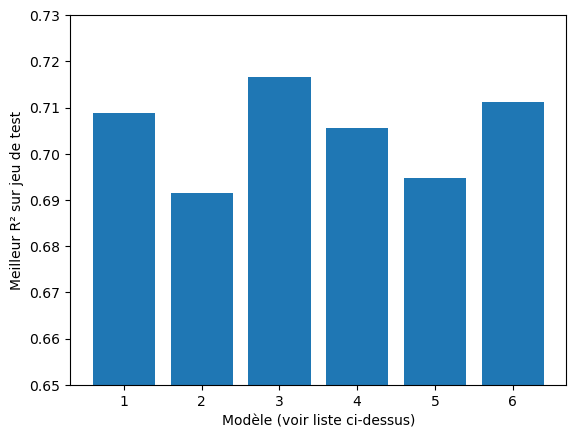

In [6]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots()
axes.bar(range(1,7),[0.7089,0.6916,0.7165,0.7055,0.6948,0.7111])
axes.set_ylim(0.65, 0.73)
plt.xlabel('Modèle (voir liste ci-dessus)')
plt.ylabel('Meilleur R² sur jeu de test')

Pour le choix du modèle, la **performance en validation croisée est plus fiable** (car on n'a pas la certitude que le jeu de test est bien représentatif de l'ensemble; Mais pour la régression linéaire on a seulement LA performance sur le jeu d'entrainement et sur le jeu de test). Voici le diagramme correspondant à ce critère, à partir des valeurs obtenues :
<br>1> Régression linéaire       -> 0.736
<br>2> ElasticNet                -> 0.67
<br>3> Kernel Ridge Regression   -> 0.725
<br>4> Support Vector Regression -> 0.726
<br>5> Random Forest Regressor   -> 0.712
<br>6> GradientBoostingRegressor -> 0.727

Text(0, 0.5, "Meilleur R² sur jeu d'entrainement")

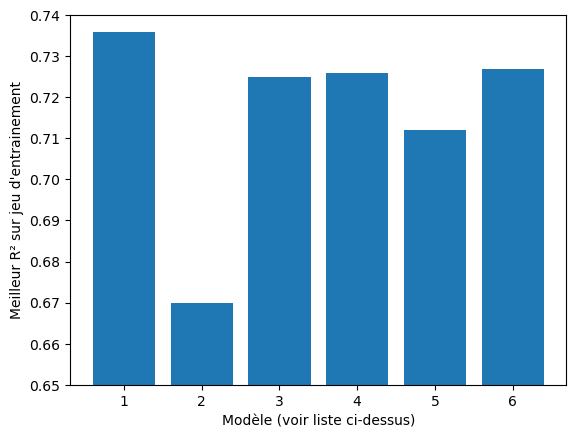

In [1]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots()
axes.bar(range(1,7),[0.736,0.67,0.725,0.726,0.712,0.727])
axes.set_ylim(0.65, 0.74)
plt.xlabel('Modèle (voir liste ci-dessus)')
plt.ylabel('Meilleur R² sur jeu d\'entrainement')

<a name='E8'>

Nous allons quand même garder la régression ridge à noyau pour la courte suite de cette étude (que je reprends ici après la soutenance qui m'a fait prendre conscience du problème de l'incertitude sur le jeu de test) mais aussi traiter la régression linéaire du coup; Suite qui va consister à **ajouter l'ENERGYSTARScore aux données de modélisation** pour en estimer le bénéfice. Cette fois nous n'allons pas imputer les valeurs manquantes de cette caractéristique, mais retirer les lignes qui ne l'ont pas, et ainsi pouvoir évaluer la donnée réelle avec les erreurs qu'elle peut contenir.

In [52]:
data.to_csv('2016_Building_Energy_Benchmarking.csv')

In [53]:
DF['ESTARScore'] = data['ENERGYSTARScore']

In [61]:
DF = DF.loc[~(DF['ESTARScore'].isna()), :]

In [62]:
DF.to_csv('DFmodel7.csv')

In [2]:
import pandas as pd
DF = pd.read_csv('DFmodel7.csv')
DF = DF.drop('Unnamed: 0', axis=1)
DF.head()

,NumberofFloors,PropertyGFATotal,PropGFABuildingPercent,UseType2GFApercent,UseType3GFApercent,SteamPercent(kBtu),ElecPercent(kBtu),NatGasPercent(kBtu),NBH_1,NBH_2,...,ThirdUse5,ThirdUse6,ThirdUse7,ThirdUse8,ThirdUse9,ThirdUse10,ThirdUse11,ThirdUse12,TotalGHGEmissions,ESTARScore
0,1.349327e+07,13.194033,100.0,0.000000,0.000000,0.0,54.147207,45.852784,0,0,...,0,0,0,0,0,0,0,0,7.143847,76.0
1,4.435615e+06,10.983868,100.0,0.000000,0.000000,0.0,60.861844,39.138124,0,0,...,0,0,0,0,0,0,0,0,3.677060,95.0
2,4.435615e+06,12.009017,100.0,0.000000,0.000000,0.0,28.729183,71.270817,0,0,...,0,0,0,0,0,0,0,0,5.602783,75.0
3,4.766002e+06,14.434315,100.0,34.465931,24.761486,0.0,33.559592,66.440401,0,0,...,0,0,0,0,0,0,0,0,9.733410,8.0
4,3.308756e+06,10.914834,100.0,0.000000,0.000000,0.0,73.780786,26.219199,0,0,...,0,0,0,0,0,0,0,0,3.480317,97.0


In [3]:
# cette fois je ne vais pas encoder l'ENERGYSTARScore, juste le standardiser comme les autres caractéristiques numériques
from sklearn.preprocessing import StandardScaler
DFnum = DF[['NumberofFloors', 'PropertyGFATotal', 'PropGFABuildingPercent', 'UseType2GFApercent', 'UseType3GFApercent', \
            'SteamPercent(kBtu)', 'ElecPercent(kBtu)', 'NatGasPercent(kBtu)', 'TotalGHGEmissions', 'ESTARScore']]
st_scaler = StandardScaler().fit(DFnum)
DFstd = st_scaler.transform(DFnum)

In [4]:
# on complete notre DFstd avec les données binaires :
DFcat = DF[DF.columns[8:75]].values 
import numpy as np
DFstd = np.concatenate((DFstd ,DFcat), axis=1)

In [5]:
from sklearn import model_selection   # la colonne 'étiquette' est la neuvième du tableau (donc n°8)
X_train, X_test, y_train, y_test = model_selection.train_test_split(np.delete(DFstd, 8, axis=1),\
                                                                    DFstd[:,8], test_size=0.2)

In [8]:
from sklearn import kernel_ridge
KRR = kernel_ridge.KernelRidge(alpha=0.15, kernel='rbf', gamma=0.025)
KRR.fit(X_train, y_train)
print('Score R² sur jeu entrainement: ', str(KRR.score(X_train, y_train)))
KRR.predict(X_test)
print('Score R² sur jeu de test: ', str(KRR.score(X_test, y_test)))

Score R² sur jeu entrainement:  0.9190460723571484
Score R² sur jeu de test:  0.8816580990514146


In [6]:
# ajout après soutenance
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
print('Score R² sur jeu d\'entrainement: ', str(lr.score(X_train, y_train)))
print('Score R² sur jeu de test: ', str(lr.score(X_test, y_test)))

Score R² sur jeu d'entrainement:  0.8666872281297953
Score R² sur jeu de test:  0.5183739549476216


In [7]:
# vérification avec KRR (ajout après soutenance):
from sklearn import kernel_ridge
KRR = kernel_ridge.KernelRidge(alpha=0.15, kernel='rbf', gamma=0.025)
KRR.fit(X_train, y_train)
print('Score R² sur jeu entrainement: ', str(KRR.score(X_train, y_train)))
KRR.predict(X_test)
print('Score R² sur jeu de test: ', str(KRR.score(X_test, y_test)))

Score R² sur jeu entrainement:  0.9237867675999357
Score R² sur jeu de test:  0.7912023499263263


Excellente performance pour le KRR ! De nouveau nous constatons que **l'utilisation de l'ENERGYSTARScore améliore vraiment la qualité de la prédiction.**
<br>Ici nous avons considéré implicitement l'ENERGYSTARScore comme une caractéristique numérique et continue, même si dans la réalité un même score peut être attribué à des propriétés très différentes en quantité d'énergie consommée comme dans la nature de cette (ou ces) énergie(s), mais puisque ça fonctionne bien pour la prédiction c'est une bonne approche, qu'il faudrait probablement aussi adopter pour la première cible.
<br>Finalement la régression linéaire est moins bonne, mais qu'en est il du GradientBoostingRegressor ?

In [8]:
# ajout après soutenance :
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(learning_rate=0.075, n_estimators=240, max_depth=4, tol=0.001)
GBR.fit(X_train, y_train)
print('Score R² sur jeu d\'entrainement: ', str(GBR.score(X_train, y_train)))
GBR.predict(X_test)
print('Score R² sur jeu de test: ', str(GBR.score(X_test, y_test)))

Score R² sur jeu d'entrainement:  0.9811727046369981
Score R² sur jeu de test:  0.7343973170706455


Le GBR est effectivement meilleur sur le jeu d'entrainement, mais moins bon sur le jeu de test que le KRR.
<br>Ce jeu de test est ici différent de celui de mon étude avant soutenance, puisqu'il est constitué avec un tirage aléatoire, cela confirmerais que le KRR est bien le plus performant globalement (son score est pourtant passé de 0.88 à 0.79 sur le jeu de test, ce qui prouve bien la sensibilité des résultats par rapport au tirage aléatoire effectué !).
<br>Donc dans un cadre d'étude professionnel réel, il est intéressant si possible de recommencer les mêmes évaluations à plusieurs reprises pour s'assurer que les résultats sont stables avec à chaque fois un jeu d'entrainement / jeu de test différent. Cela vient conforter les résultats des validations croisées (qu'on peut aussi répéter avec un 'random_state' différent) et éventuellement les modifier légerement si plusieurs modèles sont assez proches entre eux. Merci à mon évaluateur pour m'avoir permis de faire cette analyse.